# Projeto 2 - Ciencia de dados

# Indice

- [Introdução](#introdução)
- [Contexto do Dataset escolhido aplicado na realidade](#contexto)
- [Informações do Dataset](#dataset)
- [Inicializando a base de dados](#inicio_base_dados)
- [Exploração da base de dados](#explorando_base_dados)
- **[Pergunta que queremos responder](#pergunta)**
- [Específicando o Target](#target)
- [verificação da relação entre as variáveis](#relacao_de_variaveis)
- [Iniciando os modelos de predição](#predicao)
- [Aplicação do teste nos modelos](#teste)
- [Análise dos modelos de predição aplicados no dataset](#analise)
- [Conclusão](#conclusao)
- [Bibliografia](#bibliografia)

<div id="introdução"></div>

## Introdução

* A empresa InsperAnalytics contratou dois engenheiros do Insper para prestar um serviço de exploração, análise e previsão de uma variável em uma base de dados referente ao consumo de alcool dos estudantes com base nas suas informações pessoais, informações academicas e as materias estudadas no colegio.

* O objetivo dos engenheiros é fazer uma analise exploratoria completa na base de dados e conseguir informações suficientes para poder gerar uma hipotese sobre a relação da variavel escolhida com as demais e com isso prever possiveis resultados com a hipotese gerada.

* A base de dados que foi dadas ao engenheiro contem variaveis quantitativas e qualititativas, ou seja variaveis numericas e variaveis de categorias/ rotulos. 

* Todo o trabalho usará o conhecimento que os engenheiros adquiriram na materia de Ciencia de Dados, e usará a linguagem de programação python como ferramenta para esse serviço.

* O metodo de previsão será a partir de **classificadores**, por conta da maioria das variaveis serem qualitativas.

## Informações sobre os engenheiros:

* **Engenheiro 1:** Fabricio Neri Lima
    * **Curso:** Engenharia da computação
    
* **Engenheiro 2:** Wilgner Lopes Araujo
    * **Curso:** Engenharia Mecatrônica

## Informações tecnicas:

* No github onde será postado o trabalho existem duas pastas:
    * **data:** Local onde será encontrado a base de dados em arquivos csv
    * **src:** Local onde será encontrado os arquivos jupyters com todo o trabalho desenvolvido
    
* A base de dados pode ser encontrada acessando o seguinte link:
    * https://www.kaggle.com/uciml/student-alcohol-consumption?select=student-por.csv
    
* Caso queira acompanhar o trabalho desenvolvido é necessario ter as seguintes bibliotecas python instaladas:
    * Pandas
    * Numpy
    * Matplotlib
    * Seaborn
    * Scipy.stats
    * Scikit-learn
    


* A Celula abaixo importará as bibliotecas citadas e mostrará a versão instalada em sua maquina, basta roda-la:

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats

# A biblioteca Scikit-learning será chamada no momento que for necessaria sua utilização

print('Versão do pandas -> %s' % pd.__version__)
print('Versão do numpy -> %s' % np.__version__)
print('Versão do matplotlib -> %s' % mpl.__version__)
print('Versão do seaborn -> %s' % sns.__version__)
print('Versão do scipy -> %s' % scipy.__version__)


Versão do pandas -> 1.0.1
Versão do numpy -> 1.18.1
Versão do matplotlib -> 3.1.3
Versão do seaborn -> 0.10.0
Versão do scipy -> 1.4.1


<div id="contexto"></div>

## Contexto do DataSet aplicado na vida real 



De acordo com as [fontes bibliográficas](#bibliografia) que estamos utilizando, a presença do álcool na vida dos adolescentes pode ser dividida em duas partes: **fatores que motivam** o seu uso e **as consequências**.

Dentre os fatores que influênciam essa entrada, está a **relação familiar** e a **questão social**. E dentro das consequências, o aspecto de maior visibilidade é o **decaimento de rendimento** e a **evasão escolar**.


> Participam da cadeia descritiva das causas do uso do álcool diversos fatores sociodemográficos no contexto do ambiente  familiar, escolar além de outros fatores, como a relação com amigos e outros adolescentes [...]  - [Manual de orientação - Sociedade Brasileira de Pediatria](https://www.sbp.com.br/fileadmin/user_upload/publicacoes/N-ManOrient-Alcoolismo.pdf)

>Na família disfuncional, onde impera a ausência de limites, o descumprimento de regras e carência de hierarquia, de afeto e apoio, há a fragilização dos adolescentes, que tendem a preencher essas lacunas na convivência com amigos próximos ou novas amizades, abrindo espaço para contato com as drogas. - [Departamento Científico da Adolescência](https://www.sbp.com.br/especiais/pediatria-para-familias/adolescencia/adolescencia-e-alcool/)

>No que compete à situação familiar, a presença somente da mãe no domicílio do adolescente estava associada a um aumento de 22 vezes na chance deste ser dependente de drogas, quando comparado com adolescentes que viviam com ambos os pais. Corroborando estes achados, todo o corolário de trauma familiar, separação, brigas e agressões estavam francamente associados ao grupo de adolescentes com maior intensidade de dependência - [Jornal Brasileiro de Psiquiatria - Uso de álcool entre adolescentes](https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1516-44462004000500005)



<div id="dataset"></div>

## Informações sobre o dataset

Os dados foram obtidos num inquérito a alunos dos cursos de matemática e língua portuguesa do ensino secundário. Ele contém muitas informações sociais, de gênero e de estudo interessantes sobre os alunos. 
    
## Descrição das variaveis
 ### School 
 ***

Escola do aluno (binário: 'GP' - Gabriel Pereira ou 'MS' - Mousinho da Silveira)

|Código|Descrição|
|---|---|
|GP|Gabriel Pereira|
|MS|Mousinho da Silveira|

 ### Sex  
 ***

 Sexo do aluno (binário: 'F' - feminino ou 'M' - masculino)

|Código|Descrição|
|---|---|
|F|Feminino|
|M|Masculino|

 ### Age 
 ***

Idade do aluno (numérico: de 15 a 22)
 
 
 ### Address  
 ***

 Tipo de endereço residencial do aluno (binário: 'U' - urbano ou 'R' - rural)

|Código|Descrição|
|---|---|
|U|Urbano|
|R|Rural|


 ### Famsize  
 ***

 Tamanho da família (binário: 'LE3' - menor ou igual a 3 ou 'GT3' - maior que 3)

|Código|Descrição|
|---|---|
|LE3|Menor ou igual a 3|
|GT3|Maior que 3|

 ### Pstatus  
 ***

 Status de coabitação dos pais (binário: 'T' - morando juntos ou 'A' - separados)

|Código|Descrição|
|---|---|
|T|Morando juntos|
|A|Separados|

 ### Medu  
 ***

 Escolaridade da mãe (numérico: 0 - nenhuma, 1 - ensino fundamental (4ª série), 2 - 5ª a 9ª série, 3 - ensino médio ou 4 - ensino superior)

|Código|Descrição|
|---|---|
|0|Nenhuma|
|1|Ensino fundamental (4ª série)|
|2|5ª a 9ª série|
|3|Ensino médio|
|4|Ensino superior|

 ### Fedu  
 ***

 Escolaridade do pai (numérico: 0 - nenhuma, 1 - ensino fundamental (4º ano), 2 - 5º ao 9º ano, 3 - ensino médio ou 4 - ensino superior)

|Código|Descrição|
|---|---|
|0|Nenhuma|
|1|Ensino fundamental (4ª série)|
|2|5ª a 9ª série|
|3|Ensino médio|
|4|Ensino superior|

 ### Mjob  
 ***

 Trabalho da mãe (nominal: 'professora', 'cuidados de saúde' relacionados, 'serviços' civis (por exemplo, administrativo ou policial), 'em_home' ou 'outro')

|Código|Descrição|
|---|---|
|Teacher|Professora|
|'Health' care related|Cuidados de saúde|
|Civil 'services|'Serviços' civis|
|at_home'|'Em casa'|
|Other|Outro|

 ### Fjob  
 ***

 Trabalho do pai (nominal: 'professor', 'saúde' relacionado, 'serviços' civis (por exemplo, administrativo ou policial), 'em_ casa' ou 'outro')

|Código|Descrição|
|---|---|
|Teacher|Professora|
|'Health' care related|Cuidados de saúde|
|Civil 'services|'Serviços' civis|
|at_home'|'Em casa'|
|Other|Outro|

 ### Reason  
 ***

 Razão para escolher esta escola (nominal: perto de 'casa', escola 'reputação', 'curso' preferência ou 'outra')

|Código|Descrição|
|---|---|
|Close to 'home'|perto de 'casa'|
|School 'reputation'|Reputação da escola|
|course preference|Preferencia de curso|
|Other|Outro|

 ### Guardian  
 ***

 Tutor do aluno (nominal: 'mãe', 'pai' ou 'outro')

|Código|Descrição|
|---|---|
|Mother|Mãe|
|Father|Pai|
|Other|Outro|

 ### Traveltime   
 ***

 Tempo de viagem de casa para a escola (numérico: 1 - 1 hora)

 ### Studytime  
 ***

 Tempo de estudo semanal (numérico: 1 - 10 horas)

 ### Failures  
 ***

 Número de falhas de classe anteriores (numérico: n se 1 <= n <3 , senão 4)

 ### Schoolsup 
 ***

 Suporte educacional extra (binário: sim ou não)

 ### Famsup  
 ***

 Apoio educacional à família (binário: sim ou não)

 ### Paid  
 ***

 Aulas extras pagas dentro da disciplina (matemática ou português) (binário: sim ou não)

 ### Activities  
 ***

 Atividades extracurriculares (binárias: sim ou não)

 ### Nursery  
 ***

 Frequentou creche (binário: sim ou não)

 ### Higher  
 ***

 Deseja cursar o ensino superior (binário: sim ou não)

 ### Internet  
 ***

 Acesso à internet em casa (binário: sim ou não)

 ### Romantic  
 ***

 Com um relacionamento romântico (binário: sim ou não)

 ### Famrel  
 ***

 Qualidade das relações familiares (numérico: de 1 - muito ruim a 5 - excelente)

|Código|Descrição|
|---|---|
|1|Muito Ruim|
|2|Ruim|
|3|Normal|
|4|Boa|
|5|Muito Boa|

 ### Freetime  
 ***

 Tempo livre depois da escola (numérico: de 1 - muito baixo a 5 - muito alto)

|Código|Descrição|
|---|---|
|1|Muito Baixo|
|2|Baixo|
|3|Normal|
|4|Alto|
|5|Muito Alto|


 ### Goout  
 ***

 Sair com amigos (numérico: de 1 - muito baixo a 5 - muito alto)

|Código|Descrição|
|---|---|
|1|Muito Baixo|
|2|Baixo|
|3|Normal|
|4|Alto|
|5|Muito Alto|


 ### Dalc  
 ***

 Consumo de álcool durante o trabalho (numérico: de 1 - muito baixo a 5 - muito alto)

|Código|Descrição|
|---|---|
|1|Muito Baixo|
|2|Baixo|
|3|Normal|
|4|Alto|
|5|Muito Alto|

 ### Walc  
 ***

 Consumo de álcool no fim de semana (numérico: de 1 - muito baixo a 5 - muito alto)

|Código|Descrição|
|---|---|
|1|Muito Baixo|
|2|Baixo|
|3|Normal|
|4|Alto|
|5|Muito Alto|

 ### Health  
 ***

 Estado de saúde atual (numérico: de 1 - muito ruim a 5 - muito bom)

|Código|Descrição|
|---|---|
|1|Muito Ruim|
|2|Ruim|
|3|Normal|
|4|Bom|
|5|Muito Bom|

 ### Absences  
 ***

 Número de faltas escolares (numérico: de 0 a 93)

 ### G1  
 ***

 Nota do primeiro período (numérico: de 0 a 20)

 ### G2  
 ***

 Nota do segundo período (numérico: de 0 a 20)

 ### G3 
 ***

 Nota final (numérico: de 0 a 20, meta de saída)


    


<div id="inicio_base_dados"></div>




## Abrindo as bases de dados

In [2]:
# Abrindo a base de dados dos alunos de matematica
df_mat = pd.read_csv('../data/student-mat.csv')
# Abrindo a base de dados dos alunos de portugues
df_por = pd.read_csv('../data/student-por.csv')


In [3]:
# Visualizando os dados da base de dados de matematica
df_mat.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [4]:
# Visualizando os dados da base de dados de portugues
df_por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [5]:
# Vamos ver o tamanho das bases de dados

dfs = [df_mat, df_por]
Nomes = ['Matematica', 'Português']

def tamanho(df):
    linha, coluna = df.shape
    return linha, coluna

linhas_mat, colunas_mat = tamanho(dfs[0])
linhas_por, colunas_por = tamanho(dfs[1])

print(f'O tamanho do DataFrame de {Nomes[0]} tem {linhas_mat} linhas e {colunas_mat} colunas')
print(f'O tamanho do DataFrame de {Nomes[1]} tem {linhas_por} linhas e {colunas_por} colunas')

O tamanho do DataFrame de Matematica tem 395 linhas e 33 colunas
O tamanho do DataFrame de Português tem 649 linhas e 33 colunas


In [6]:
# Agora vamos obter as primeiras informações sobre nossos dataframes
def info(df):
    info = df.info()
    return info

for i in range(2):
    print(f'Informações do DataFrame de {Nomes[i]} \n')
    print(info(dfs[i]), '\n')


Informações do DataFrame de Matematica 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery  

<div id="pergunta"></div>

## Definindo a pergunta que queremos responder

Em todas as bibliografias, foram apresentados motivos que causavam a entrada adolescente no consumo de álcool, principalmente aspectos relacionados ao seu ambiente familiar e social, contudo, apenas um dos artigos apresentou uma relação de proporcionalidade. Por isso, de modo a investigar se as afirmações são verdadeiras, vamos investigar os dados do dataset relacionados aos aspectos familiares dos estudantes, ou seja, selecionaremos apenas as colunas relacionadas a esses aspectos para realizarmos a investigação de se **as colunas de aspectos familiares e sociais afetam o consumo de álcool dos alunos.**

|Código|Descrição|
|---|---|
|School|Escola|
|Sex|Sexo|
|Age|Idade|
|Famsize|Tamanho da família|
|Pstatus|Status de coabitação dos pais|
|Medu/Fedu|Escolaridade da mãe/pai|
|Mjob/Fjob|Trabalho da mãe|
|Guardian|Tutor do aluno |
|Famsup|Apoio educacional à família|
|Famreal|Qualidade das relações familiares|
|Internet|Acesso à internet em casa|
|Romantic|Com um relacionamento romântico|
|Goout|Sair com amigos|
|Dalc|Consumo de álcool durante o trabalho|
|Walc|Consumo de álcool no fim de semana|

In [7]:
colunas_selecionadas = ['school', 'sex', 'age', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup',
                        'famrel', 'internet', 'romantic', 'goout', 'Dalc', 'Walc']

analise_df_mat = df_mat.loc[:, colunas_selecionadas]
analise_df_por = df_por.loc[:, colunas_selecionadas]

In [8]:
analise_df_mat.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,4,4,at_home,teacher,mother,no,4,no,no,4,1,1
1,GP,F,17,GT3,T,1,1,at_home,other,father,yes,5,yes,no,3,1,1
2,GP,F,15,LE3,T,1,1,at_home,other,mother,no,4,yes,no,2,2,3
3,GP,F,15,GT3,T,4,2,health,services,mother,yes,3,yes,yes,2,1,1
4,GP,F,16,GT3,T,3,3,other,other,father,yes,4,no,no,2,1,2


In [9]:
analise_df_por.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,4,4,at_home,teacher,mother,no,4,no,no,4,1,1
1,GP,F,17,GT3,T,1,1,at_home,other,father,yes,5,yes,no,3,1,1
2,GP,F,15,LE3,T,1,1,at_home,other,mother,no,4,yes,no,2,2,3
3,GP,F,15,GT3,T,4,2,health,services,mother,yes,3,yes,yes,2,1,1
4,GP,F,16,GT3,T,3,3,other,other,father,yes,4,no,no,2,1,2


#### Alterando as faixas pelos rótulos

De modo a melhorar a análise, vamos alterar as faixas que estão presentes nas colunas pelos seus respectivos rótulos. Para isso, estamos criando uma função.

In [10]:
# Exemplo com a coluna SATISFACAO
from pandas.api.types import CategoricalDtype

frequencia = ['muito baixo', 'baixo', 'normal', 'alto', 'muito alto']
colunas_troca_rotulo = ['goout', 'Dalc', 'Walc']

def troca_rotulo (linha):
    if linha == 1:
        return frequencia[0]
    elif linha == 2:
        return frequencia[1]
    elif linha == 3:
        return frequencia[2]
    elif linha == 4:
        return frequencia[3]
    elif linha == 5:
        return frequencia[4]

frequencia_type = CategoricalDtype(
    categories=['muito baixo', 'baixo', 'normal', 'alto', 'muito alto'], 
    ordered=True
)

for coluna in colunas_troca_rotulo:
    analise_df_mat[coluna] = analise_df_mat[coluna].apply(troca_rotulo).astype(frequencia_type)
    analise_df_por[coluna] = analise_df_por[coluna].apply(troca_rotulo).astype(frequencia_type)

analise_df_mat.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,4,4,at_home,teacher,mother,no,4,no,no,alto,muito baixo,muito baixo
1,GP,F,17,GT3,T,1,1,at_home,other,father,yes,5,yes,no,normal,muito baixo,muito baixo
2,GP,F,15,LE3,T,1,1,at_home,other,mother,no,4,yes,no,baixo,baixo,normal
3,GP,F,15,GT3,T,4,2,health,services,mother,yes,3,yes,yes,baixo,muito baixo,muito baixo
4,GP,F,16,GT3,T,3,3,other,other,father,yes,4,no,no,baixo,muito baixo,baixo


In [11]:
educacao = ['nenhum', 'ensino fundamental', '5ª a 9ª série', 'ensino médio', 'ensino superior']
colunas_troca_estudo = ['Medu', 'Fedu']

def nomeia_estudo(linha):
    if linha == 0:
        return educacao[0]
    elif linha == 1:
        return educacao[1]
    elif linha == 2:
        return educacao[2]
    elif linha == 3:
        return educacao[3]
    elif linha == 4:
        return educacao[4]

education_type = CategoricalDtype(
    categories=['Nenhum', 'ensino fundamental', '5ª a 9ª série', 'ensino médio', 'ensino superior'], 
    ordered=True
)

for coluna in colunas_troca_estudo:
    analise_df_mat[coluna] = analise_df_mat[coluna].apply(nomeia_estudo).astype(education_type)
    analise_df_por[coluna] = analise_df_por[coluna].apply(nomeia_estudo).astype(education_type)
    
analise_df_mat.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,ensino superior,ensino superior,at_home,teacher,mother,no,4,no,no,alto,muito baixo,muito baixo
1,GP,F,17,GT3,T,ensino fundamental,ensino fundamental,at_home,other,father,yes,5,yes,no,normal,muito baixo,muito baixo
2,GP,F,15,LE3,T,ensino fundamental,ensino fundamental,at_home,other,mother,no,4,yes,no,baixo,baixo,normal
3,GP,F,15,GT3,T,ensino superior,5ª a 9ª série,health,services,mother,yes,3,yes,yes,baixo,muito baixo,muito baixo
4,GP,F,16,GT3,T,ensino médio,ensino médio,other,other,father,yes,4,no,no,baixo,muito baixo,baixo


In [12]:
relacao = ['muito ruim', 'ruim', 'normal', 'boa', 'muito boa']
colunas_troca_relacao = ['famrel']

def nomeia_relacao(linha):
    if linha == 1:
        return relacao[0]
    elif linha == 2:
        return relacao[1]
    elif linha == 3:
        return relacao[2]
    elif linha == 4:
        return relacao[3]
    elif linha == 5:
        return relacao[4]

relation_type = CategoricalDtype(
    categories=['muito ruim', 'ruim', 'normal', 'boa', 'muito boa'], 
    ordered=True
)

for coluna in colunas_troca_relacao:
    analise_df_mat[coluna] = analise_df_mat[coluna].apply(nomeia_relacao).astype(relation_type)
    analise_df_por[coluna] = analise_df_por[coluna].apply(nomeia_relacao).astype(relation_type)
    
analise_df_mat.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,ensino superior,ensino superior,at_home,teacher,mother,no,boa,no,no,alto,muito baixo,muito baixo
1,GP,F,17,GT3,T,ensino fundamental,ensino fundamental,at_home,other,father,yes,muito boa,yes,no,normal,muito baixo,muito baixo
2,GP,F,15,LE3,T,ensino fundamental,ensino fundamental,at_home,other,mother,no,boa,yes,no,baixo,baixo,normal
3,GP,F,15,GT3,T,ensino superior,5ª a 9ª série,health,services,mother,yes,normal,yes,yes,baixo,muito baixo,muito baixo
4,GP,F,16,GT3,T,ensino médio,ensino médio,other,other,father,yes,boa,no,no,baixo,muito baixo,baixo


In [13]:
# Checando os tipos de variaveis atuais
analise_df_mat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   school    395 non-null    object  
 1   sex       395 non-null    object  
 2   age       395 non-null    int64   
 3   famsize   395 non-null    object  
 4   Pstatus   395 non-null    object  
 5   Medu      392 non-null    category
 6   Fedu      393 non-null    category
 7   Mjob      395 non-null    object  
 8   Fjob      395 non-null    object  
 9   guardian  395 non-null    object  
 10  famsup    395 non-null    object  
 11  famrel    395 non-null    category
 12  internet  395 non-null    object  
 13  romantic  395 non-null    object  
 14  goout     395 non-null    category
 15  Dalc      395 non-null    category
 16  Walc      395 non-null    category
dtypes: category(6), int64(1), object(10)
memory usage: 37.6+ KB


### Agora teremos todas as colunas identificadas com suas propriedades corretas

In [14]:
colunas_qualitativas = ['school', 'sex', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'guardian', 'famsup', 'internet', 'romantic']
for coluna in colunas_qualitativas:
    analise_df_mat[coluna] = analise_df_mat[coluna].astype('category')
    analise_df_por[coluna] = analise_df_por[coluna].astype('category')


### Juntando os DataFrames

Como o nosso objetivo não é verificar individualmente os alunos da classe de matemática ou os alunos da classe de língua portuguesa, vamos juntar os dois dataframes.

In [15]:
analise_df_completo = pd.concat([analise_df_mat, analise_df_por])
analise_df_completo.dropna(inplace=True)
analise_df_completo.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,internet,romantic,goout,Dalc,Walc
0,GP,F,18,GT3,A,ensino superior,ensino superior,at_home,teacher,mother,no,boa,no,no,alto,muito baixo,muito baixo
1,GP,F,17,GT3,T,ensino fundamental,ensino fundamental,at_home,other,father,yes,muito boa,yes,no,normal,muito baixo,muito baixo
2,GP,F,15,LE3,T,ensino fundamental,ensino fundamental,at_home,other,mother,no,boa,yes,no,baixo,baixo,normal
3,GP,F,15,GT3,T,ensino superior,5ª a 9ª série,health,services,mother,yes,normal,yes,yes,baixo,muito baixo,muito baixo
4,GP,F,16,GT3,T,ensino médio,ensino médio,other,other,father,yes,boa,no,no,baixo,muito baixo,baixo


In [16]:
analise_df_completo.shape

(1027, 17)

<div id="target"></div>

## Específicando o Target

In [17]:
analise_df_completo.Dalc.value_counts(normalize=True)*100

muito baixo    69.620253
baixo          18.695229
normal          6.621227
muito alto      2.531646
alto            2.531646
Name: Dalc, dtype: float64

In [18]:
analise_df_completo.Walc.value_counts(normalize=True)*100

muito baixo    37.682571
baixo          22.784810
normal         19.279455
alto           13.242454
muito alto      7.010711
Name: Walc, dtype: float64

Como visto acima, a coluna WALC que representa o quanto de bebida os alunos consomem durante o fim de semana tem uma maior aderência de consumo que álcool que a coluna DALC, que representa o consumo de álcool por aluno durante os úteis da semana. Já que queremos responder se o consumo de álcool depende ou não das variáveis familiares e sociais, vamos focar na coluna **WALC** como target, já que ela demonstra ter uma resposta melhor quanto ao que queremos descobrir.

In [19]:
rotulos = ['school', 'sex', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'famsup',
                        'famrel', 'internet', 'romantic', 'goout']


def tabela_cruzada(df, index):
    
    return (pd.crosstab(df['Walc'], df[rotulos[index]], normalize = 'columns')*100).round(2)


In [20]:
def plota_barras(df,numero):
    
    tabela = tabela_cruzada(df, numero)
    
        
    grafico = tabela.stack().reset_index().rename(columns={0:'Percent'})
    
    sns.set_style("white")
    
    sns.despine()
    sns.set_context("talk")
    
    fig = plt.figure(figsize=(15,7))
    ax = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    ax.set_title(f'Grafico referente a {rotulos[numero]} x Walc', fontsize=15, pad=15, fontweight = 'bold')
    ax.set_xlabel('Walc',fontsize=15, labelpad=15, fontweight = 'bold')
    ax.set_ylabel('Percent',fontsize=15, labelpad=15, fontweight = 'bold')
    
    font_size=16
    
    ax2.axis('off')
    sns.barplot(ax=ax,x=grafico.Walc, y=grafico.Percent, hue=grafico[rotulos[numero]], palette='hls')
    
    mpl_table = ax2.table(cellText = tabela.values, bbox=[0.2,0,2,1],loc='bottom', colLoc='center', cellLoc='center',
                          rowLoc='center', rowLabels = tabela.index, colLabels=tabela.columns)
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)
    
#     plt.show();
    


<div id="relacao_de_variaveis"></div>

# Verificando as relações entre as variaveis do dataset e o target

<Figure size 432x288 with 0 Axes>

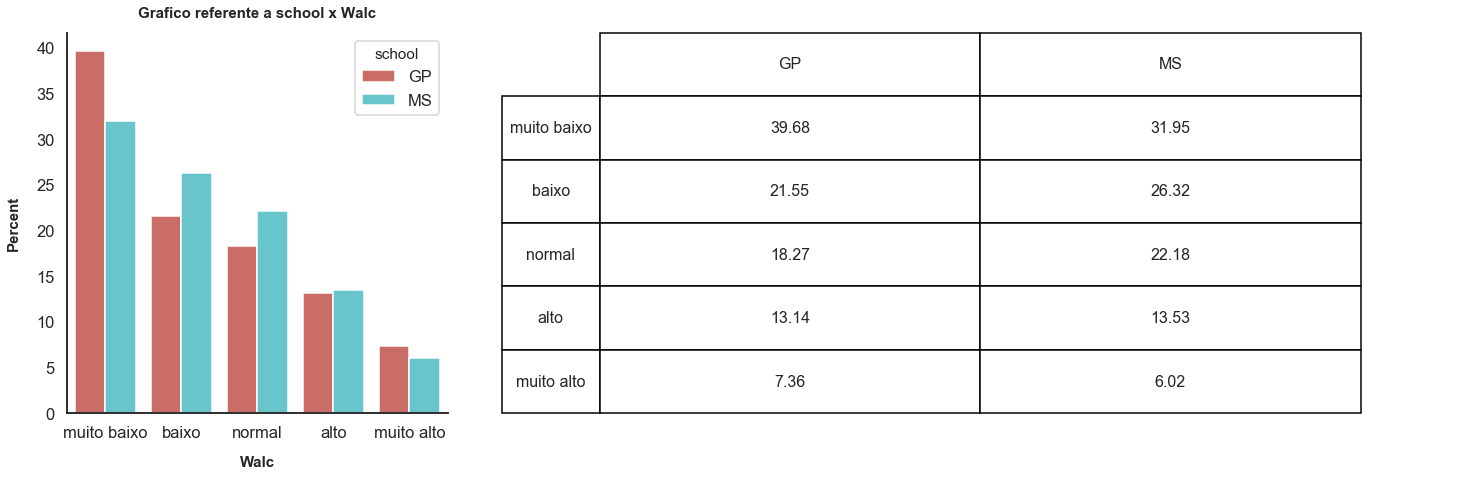

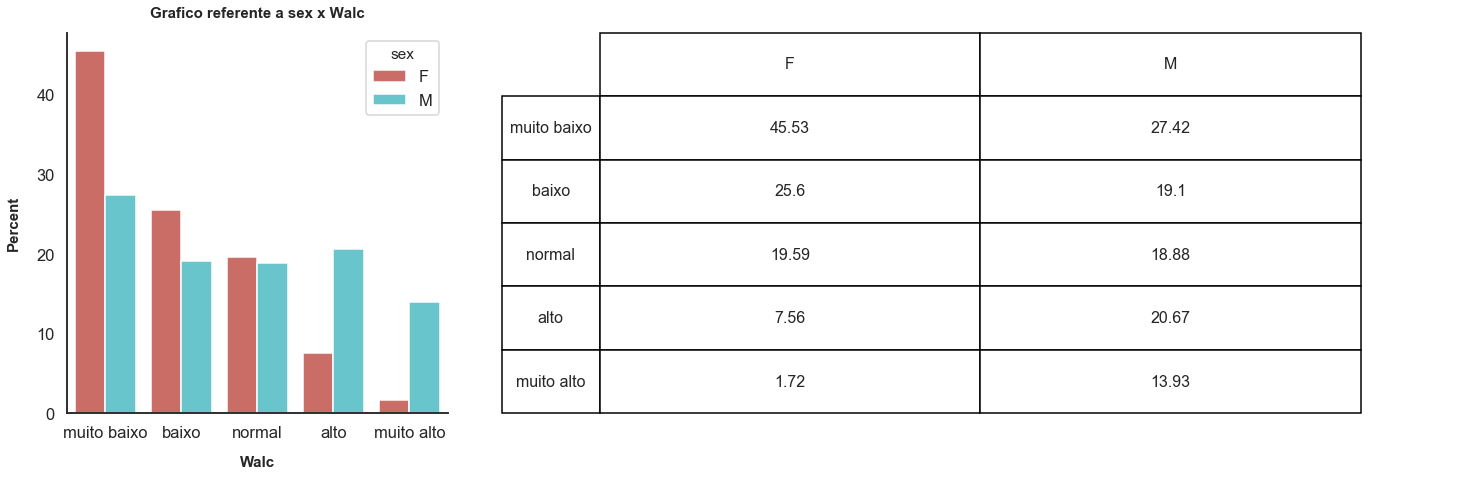

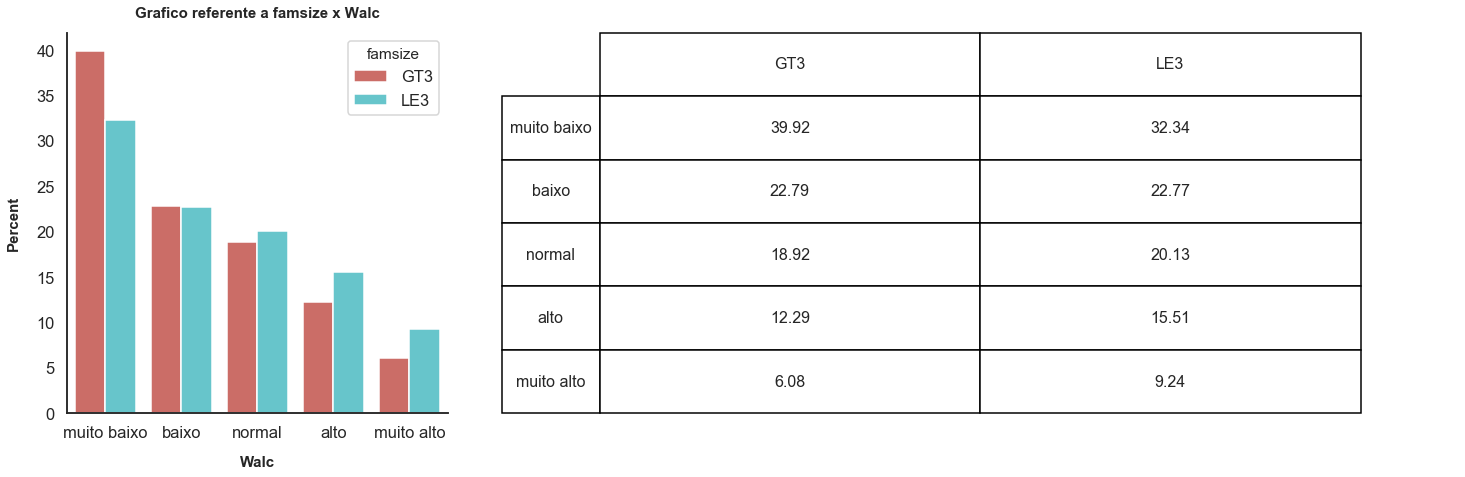

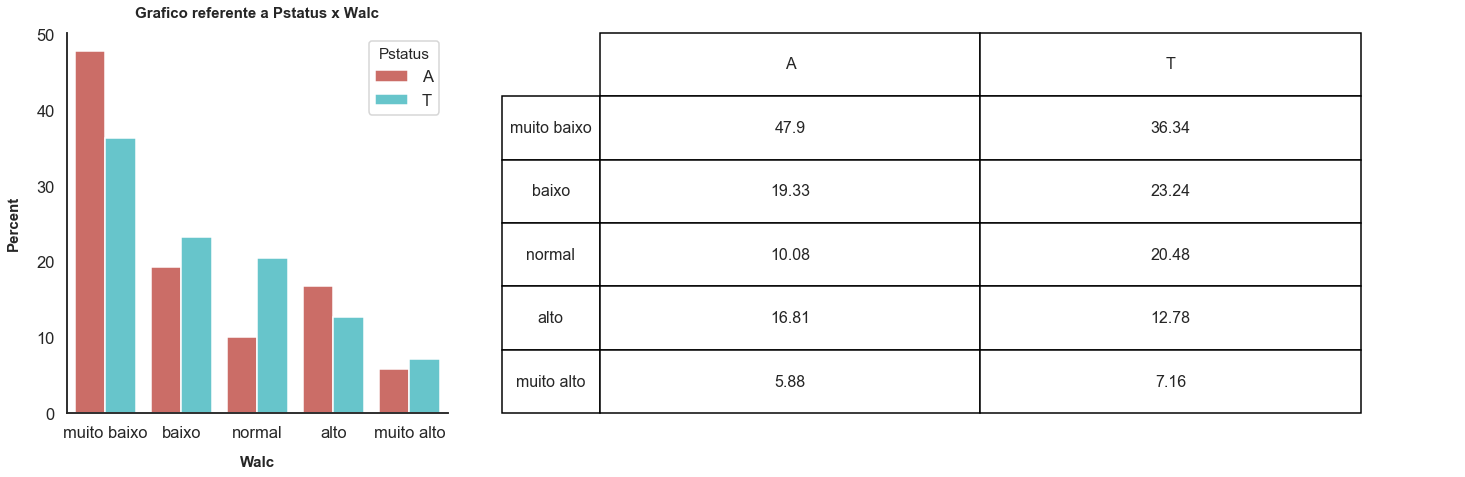

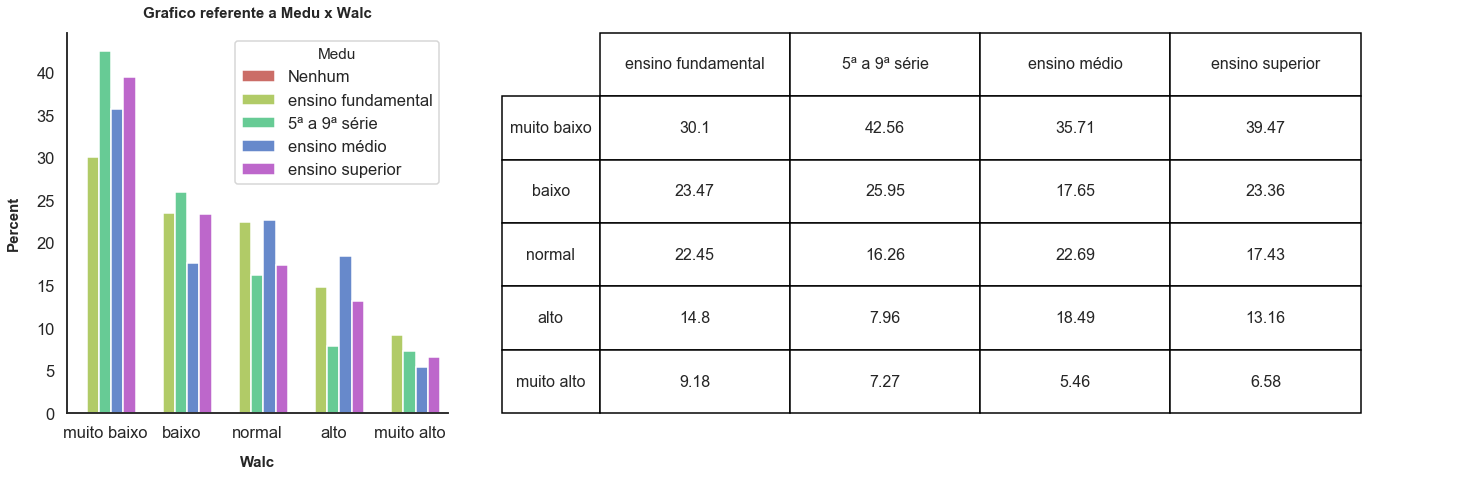

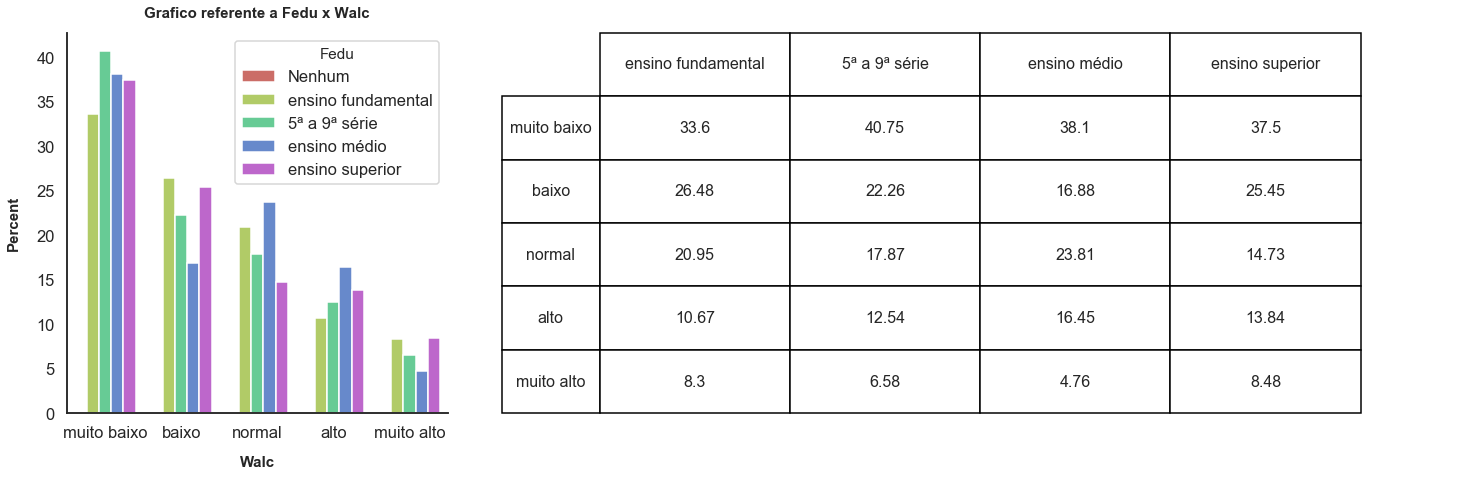

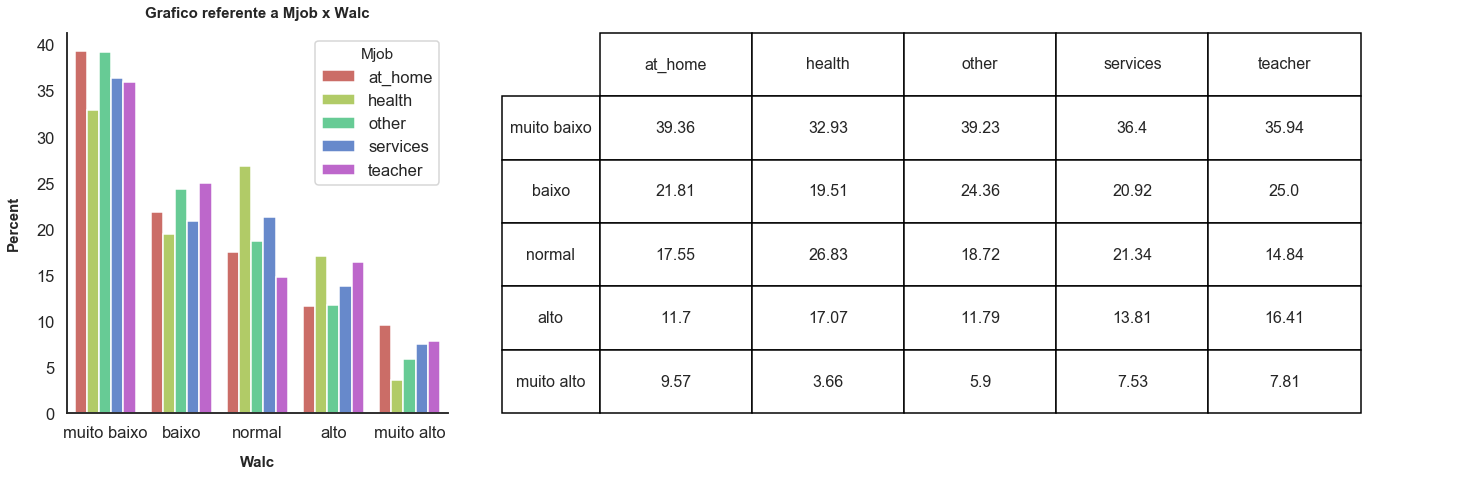

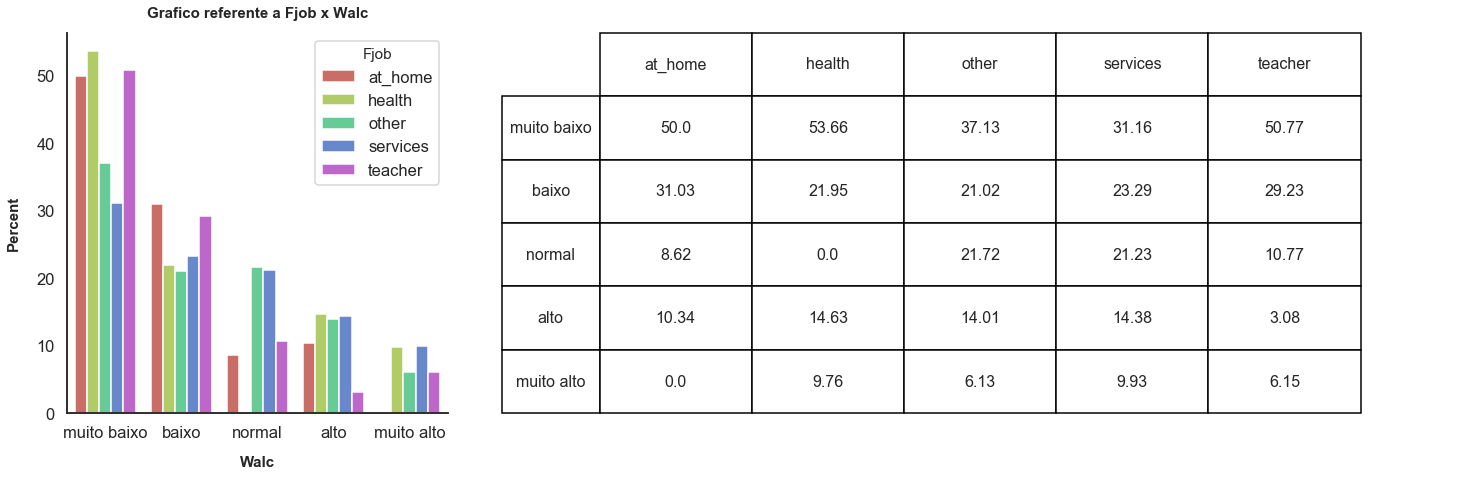

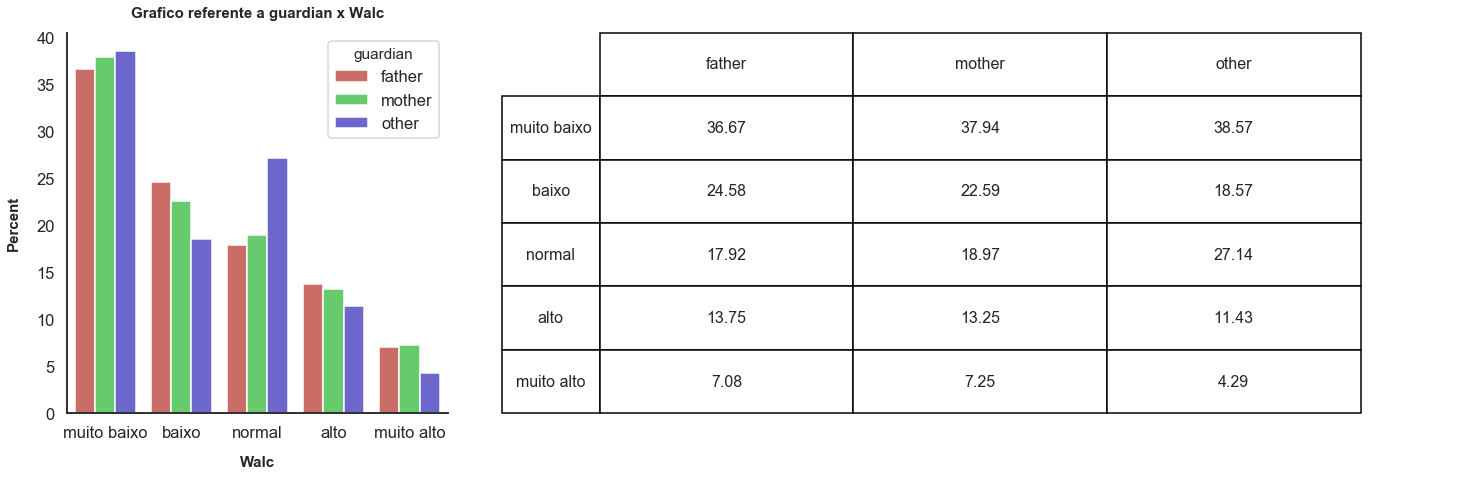

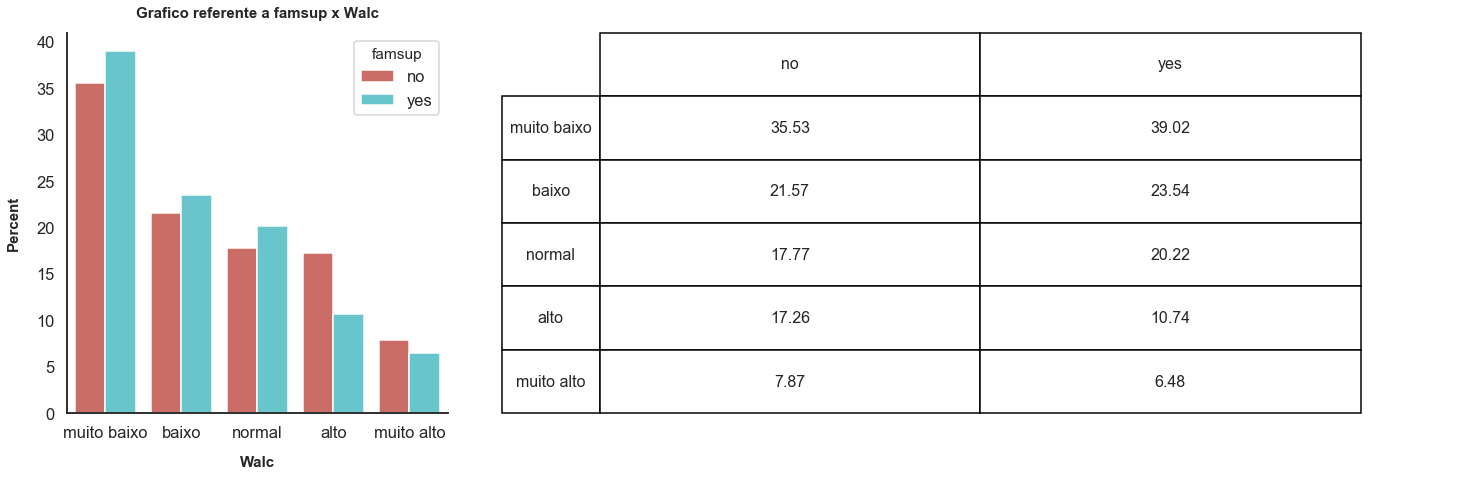

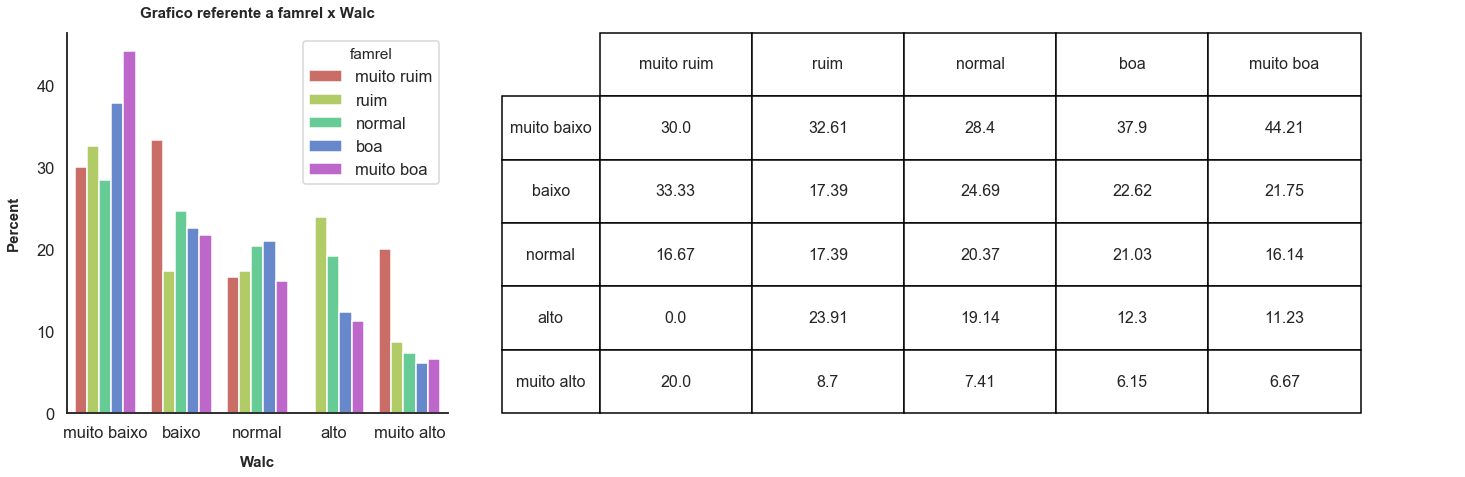

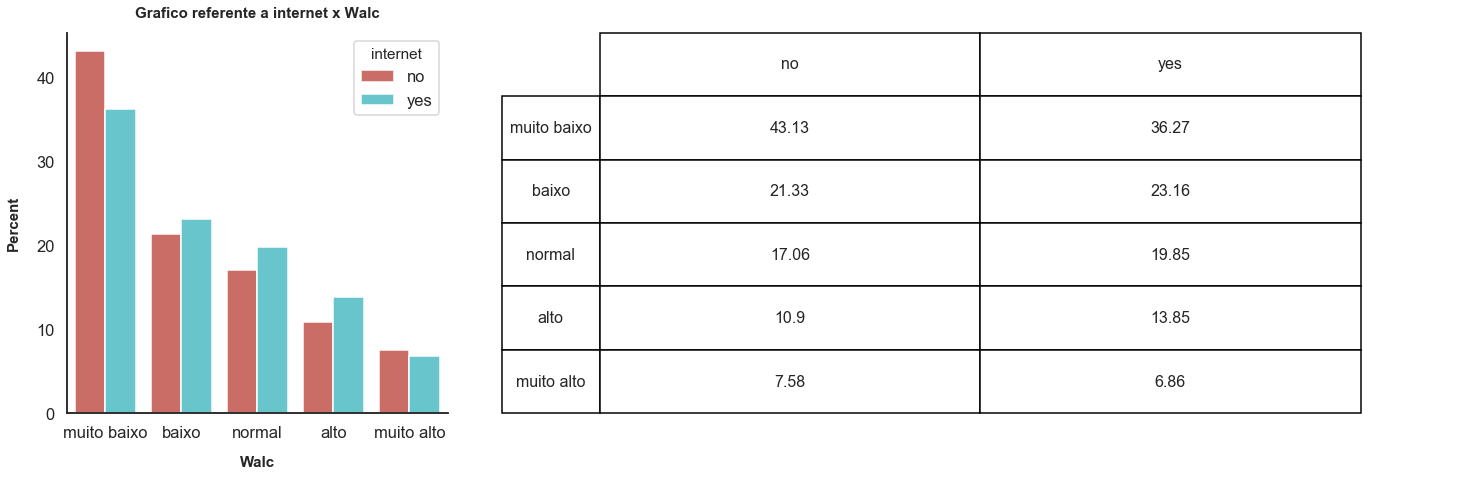

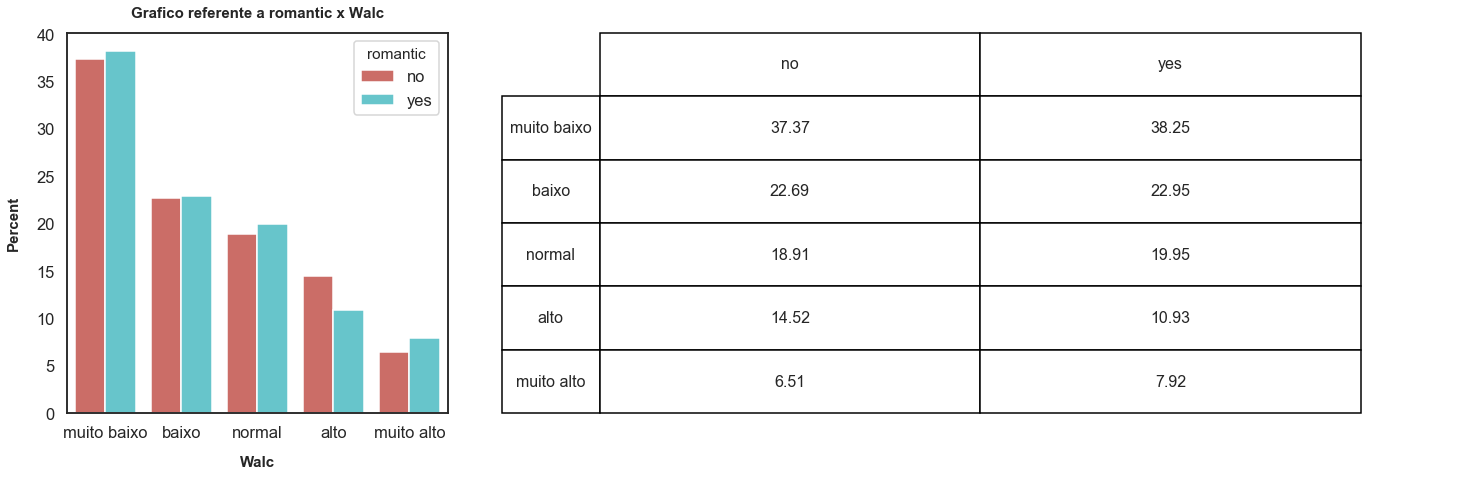

In [21]:
for i in range(0,13,1):
    plota_barras(analise_df_completo,i)

Pelo cruzamento entre a escola dos estudantes e o consumo de álcool durante os fins de semana, considerando um consumo relevante de álcool a partir de normal, a escola MS tem um consumo maior de álcool (aproximadamente 42%) que a escola GP (com aproximadamente 38%)

<Figure size 432x288 with 0 Axes>

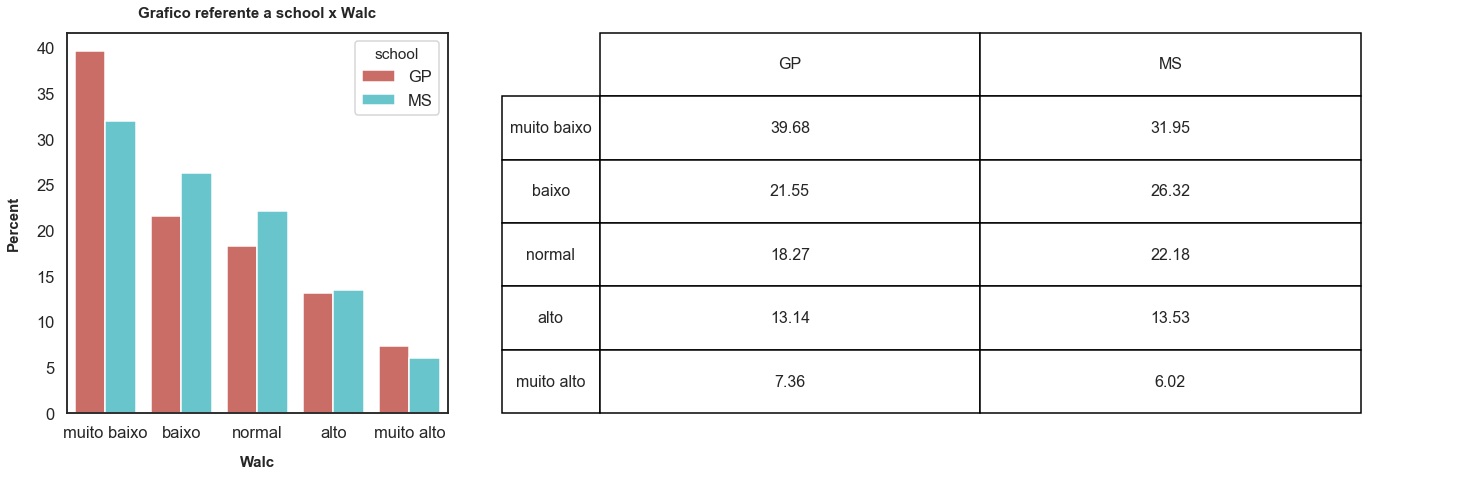

In [22]:
plota_barras(analise_df_completo, 0)

Quando comparado o consumo de álcool entre os meninos e as meninas, ficou evidenciado que os meninos consomem mais álcool que as meninas durante o fim de semana.

<Figure size 432x288 with 0 Axes>

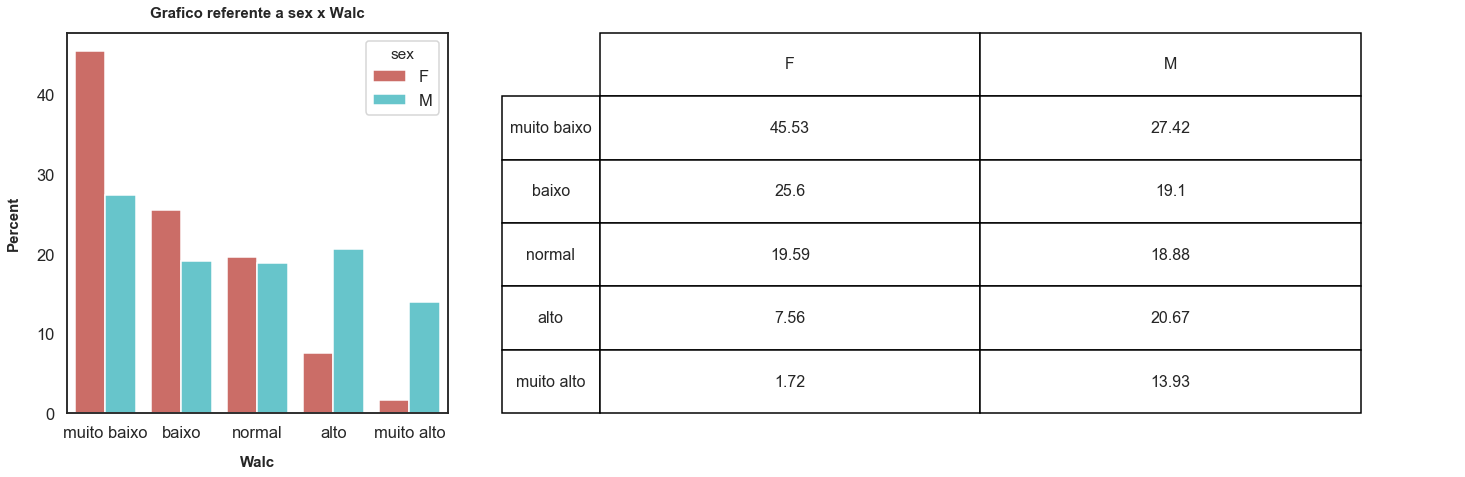

In [23]:
plota_barras(analise_df_completo, 1)

Através do cruzamento do consumo de álcool durante os fins de semana com o tamanho da família do estudante, foi possível perceber que a porcentagem de alunos com menos de 3 pessoas na família consomem mais álcool aos fins de semana que alunos de famílias maiores que 3 pessoas.

<Figure size 432x288 with 0 Axes>

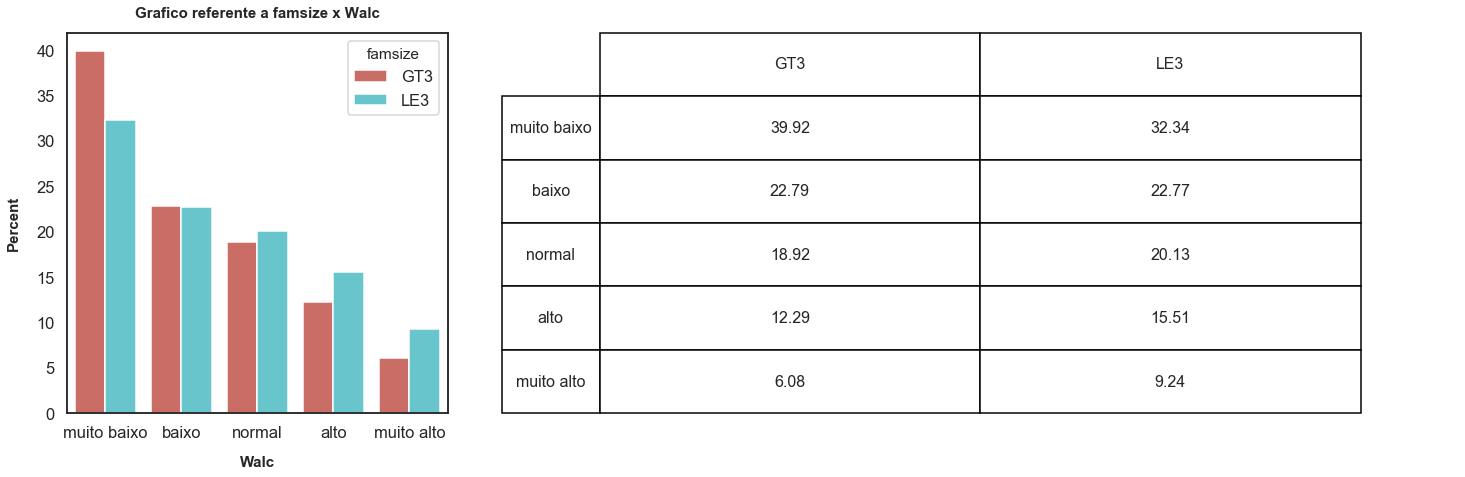

In [24]:
plota_barras(analise_df_completo, 2)

Ao compararmos o estado dos pais dos alunos com o seu consumo de álcool nos fins de semana, os filhos de pais não divorciados apresentaram um consumo maior nas faixas baixo, normal e muito alto, o que significaria que ter pais casados aparenta influenciar mais o consumo de álcool que pais separados.

<Figure size 432x288 with 0 Axes>

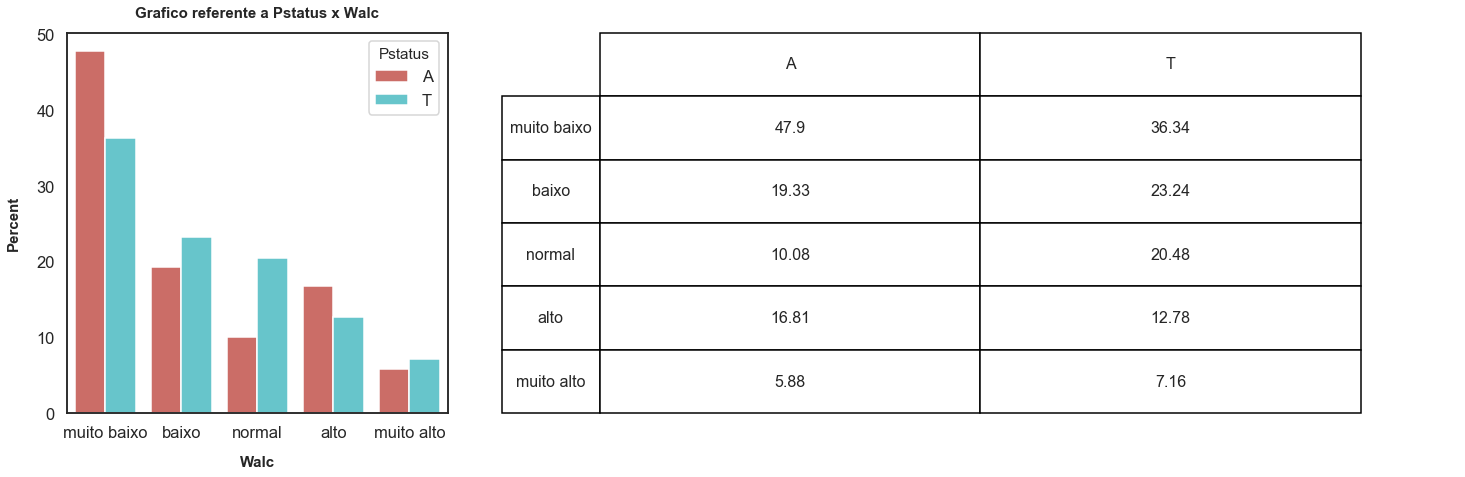

In [25]:
plota_barras(analise_df_completo, 3)

Pela análise do cruzamento entre o consumo de álcool aos fins de semana e o nível de escolaridade da mãe, apesar de parecerem bem semelhantes, dá para perceber que no menor nível de escolaridade, fundamental, o consumo de álcool dos filhos sempre tende a ser um dos maiores quando comparados com os filhos de mães com escolaridades diferentes. Contudo, não é possível perceber um padrão de que quanto maior o nível de escolaridade, menor o consumo de álcool.

<Figure size 432x288 with 0 Axes>

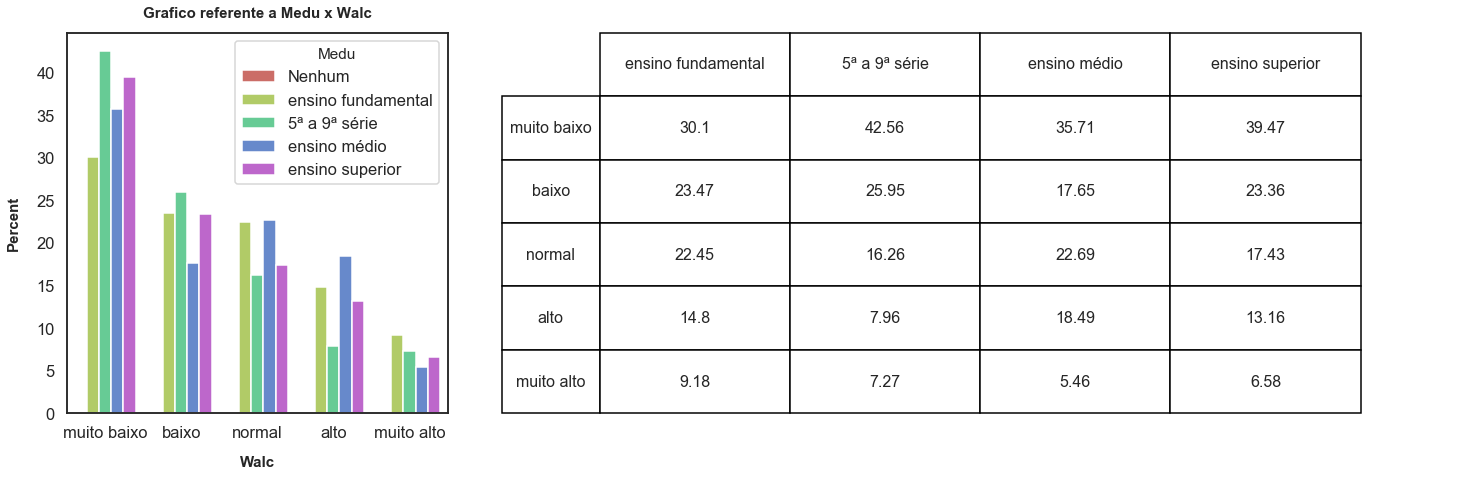

In [26]:
plota_barras(analise_df_completo, 4)

Assim como no cruzamento do nível de escolaridade da mãe, o cruzamento do consumo de álcool com o nível de escolaridade do pai não demonstra uma grande mudança no consumo de álcool do filho, não há um padrão ou uma relação de proporcionalidade evidente.

<Figure size 432x288 with 0 Axes>

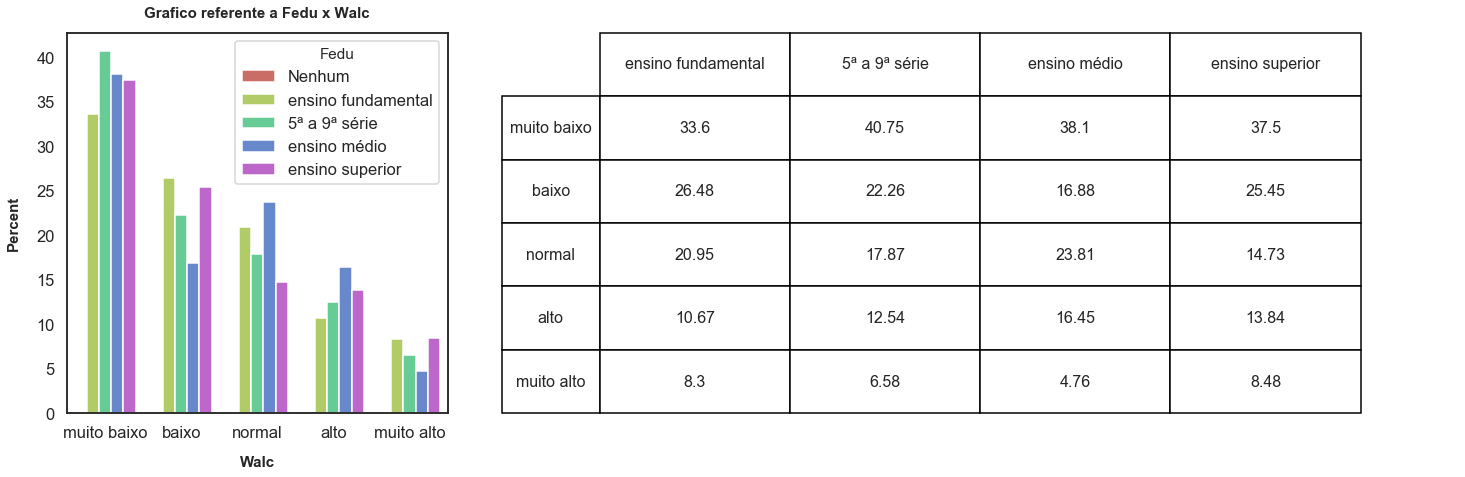

In [27]:
plota_barras(analise_df_completo, 5)

Também como percebido no nível de escolaridade da mãe, o consumo de álcool dos filhos durante os fins de semana não é significativamente alterado pela profissão da mãe.

<Figure size 432x288 with 0 Axes>

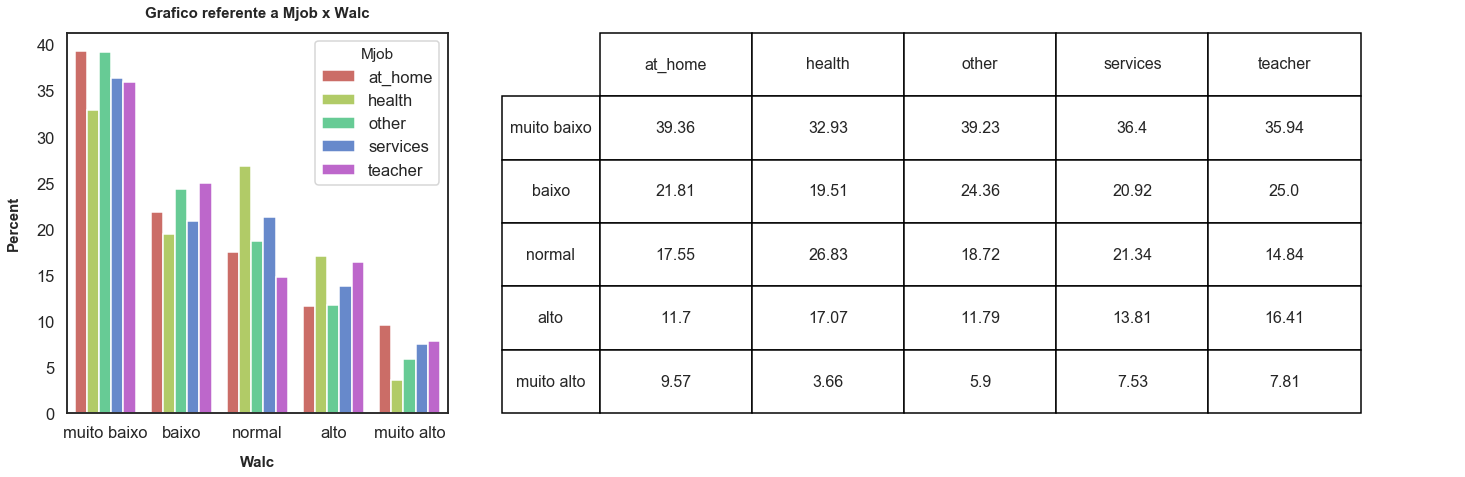

In [28]:
plota_barras(analise_df_completo, 6)

Através do cruzamento da profissão do pai com o consumo de álcool do filho, fica mais claro que para a profissão de professor, o filho toma bem menos álcool quando comparado a filhos de pais com profissões diferentes.

<Figure size 432x288 with 0 Axes>

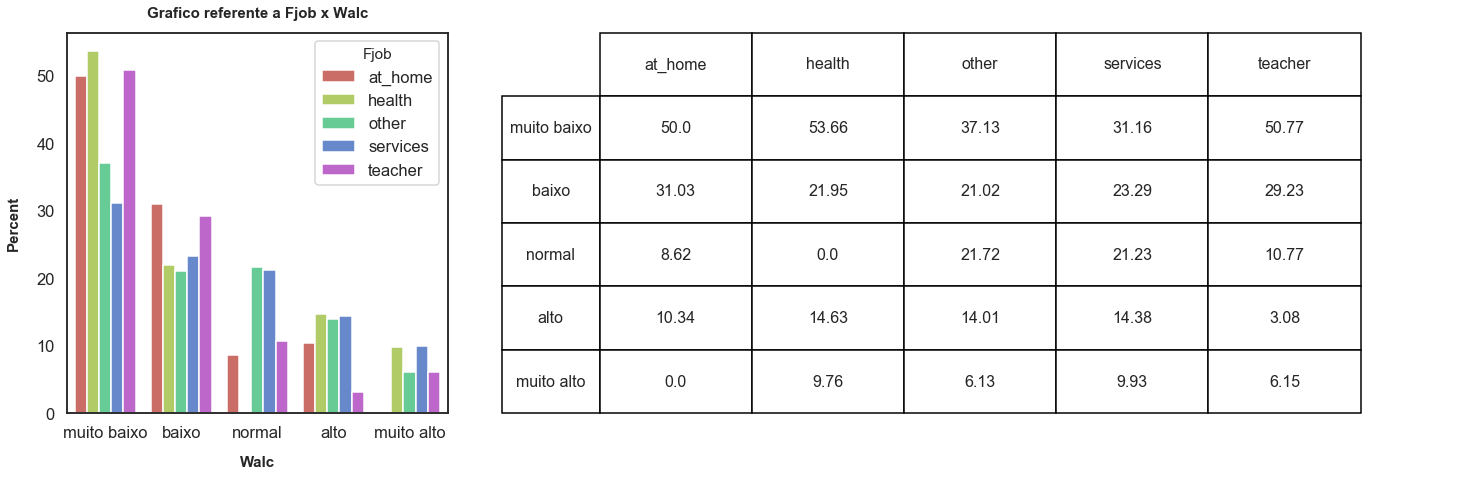

In [29]:
plota_barras(analise_df_completo, 7)

Ao cruzarmos os dados de consumo de álcool ao sábado e domingo, é possível perceber que o consumo de álcool de maneira regular é bem maior quando o responsável pelo aluno não é ou o pai ou a mãe.

<Figure size 432x288 with 0 Axes>

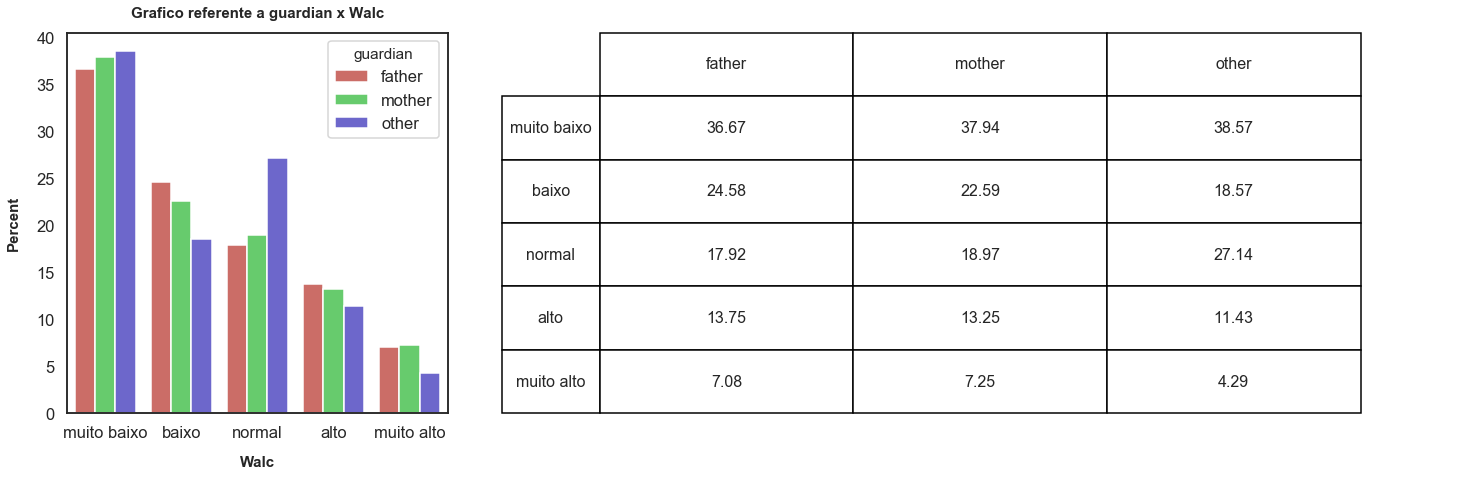

In [30]:
plota_barras(analise_df_completo, 8)

A tabela cruzada entre suporte familiar e o consumo de álcool no fim de semana permite indentificar que os alunos que tem suporte familiar tem bem menos probabilidade de consumir álcool em **altas quantidades**.

<Figure size 432x288 with 0 Axes>

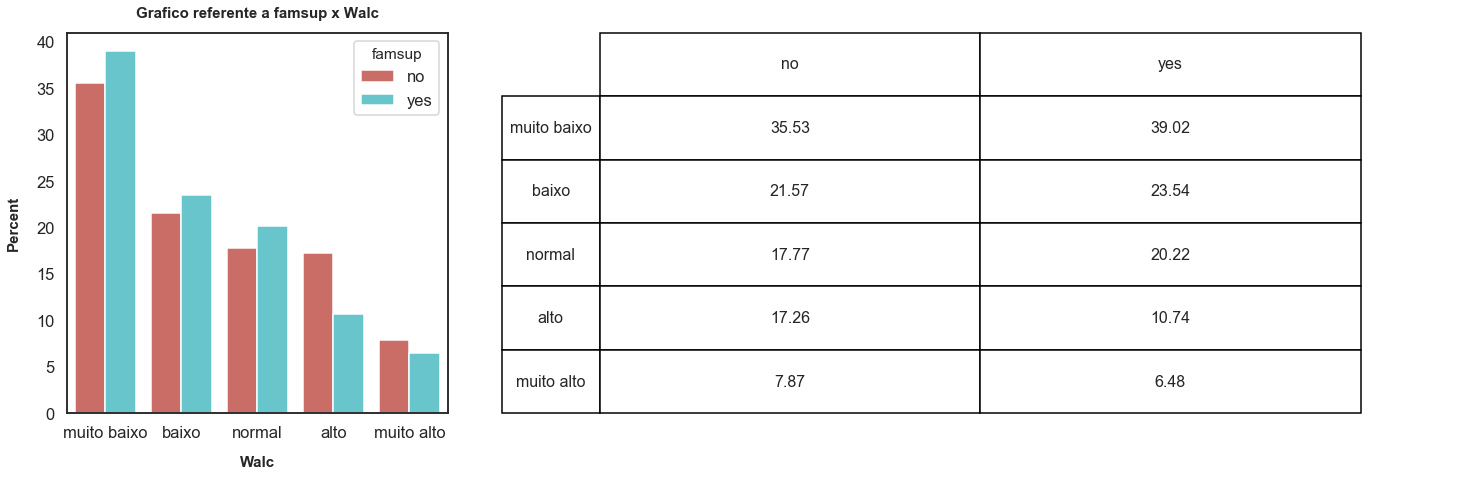

In [31]:
plota_barras(analise_df_completo, 9)

No cruzamento da relação familiar com o consumo de álcool, fica evidente que quanto pior a relação familiar entre o aluno e a sua família, maior a probabilidade dele ter um consumo muito alto de álcool.

<Figure size 432x288 with 0 Axes>

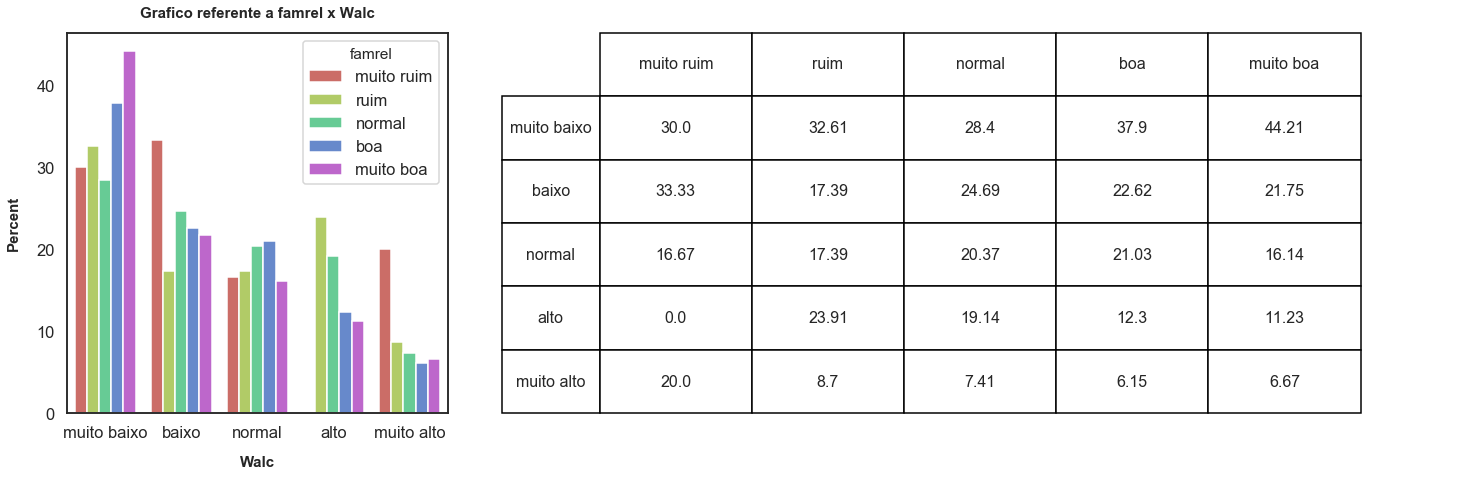

In [32]:
plota_barras(analise_df_completo, 10)

O cruzamento entre o acesso à internet do aluno e o consumo de álcool não evidenciou nenhuma diferença significativa no consumo de álcool aos fins de semana.

<Figure size 432x288 with 0 Axes>

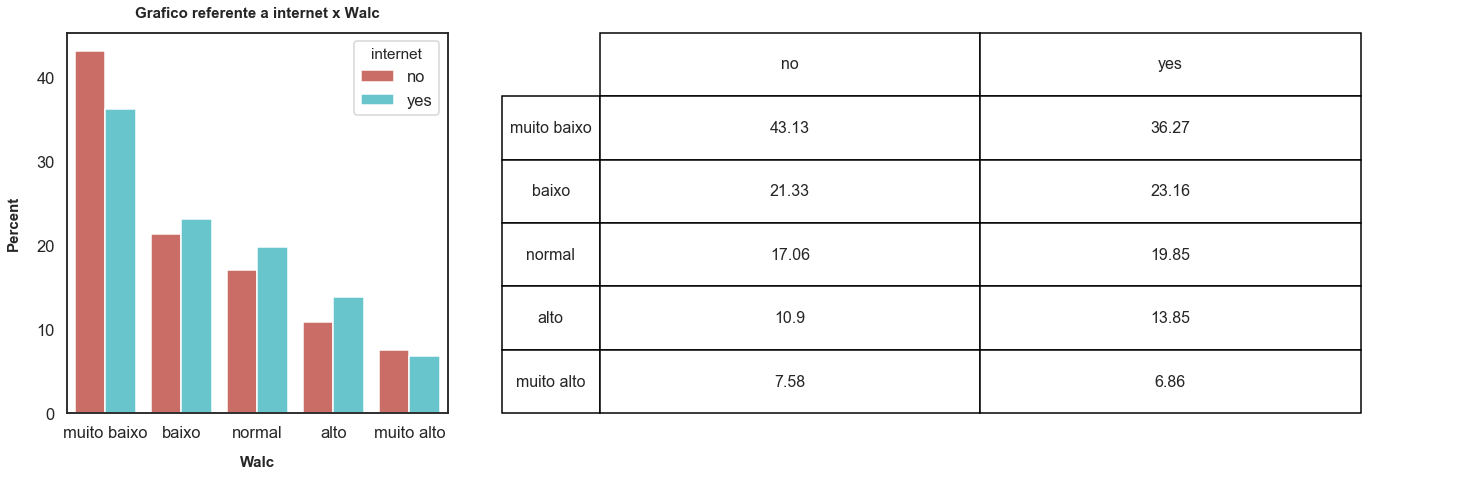

In [33]:
plota_barras(analise_df_completo, 11)

O cruzamento entre o estudante estar ou não namorando também não relevou uma grande diferença no consumo de álcool aos fins de semana.

<Figure size 432x288 with 0 Axes>

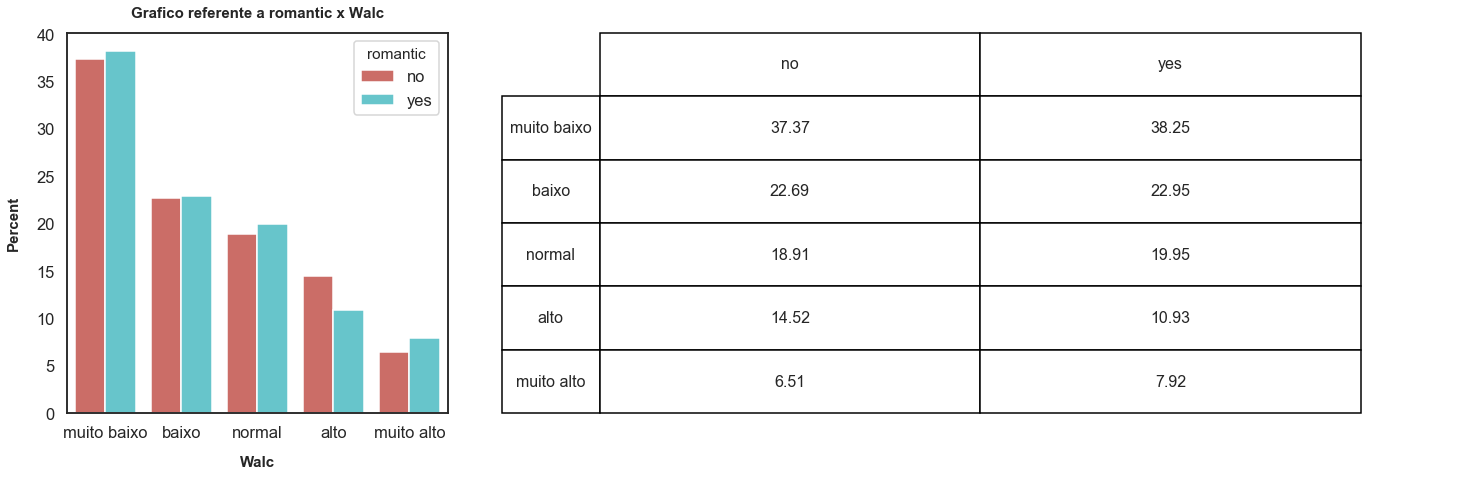

In [34]:
plota_barras(analise_df_completo, 12)

### Conclusões dos cruzamentos



Após a análise feita através dos cruzamentos, foi possível perceber que algumas variáveis apresentam algum tipo de relação, mesmo que pequena, como o trabalho dos pais (apesar de não oferecer uma diferença significativamente grande), a relação entre os pais e filhos e etc. O fato de não haver uma ligação clara entre as variáveis familiares e socias fez cogitarmos uma investigação mais profunda a partir de um modelo de predição.

Algumas outras variáveis não demonstraram relação alguma como o acesso à internet ou a situação amorosa do estudante, neste caso não iremos avaliar mais profudamente essas variáveis.

<div id="predicao"></div>

# Iniciando os modelos de predição

Como nos escolhemos apenas variaveis qualitativas, nossos modelos de predição serão classificadores. Por isso usaremos aqui dois modelos de predição:

* Multinomial Naive Bayes
* Random forest


Como foi notado que as variaveis internet e romantic não demonstram muita relação com o fato do individuo beber muito ou não, iremos remover ela do nosso dataframe

In [35]:
del analise_df_completo['romantic']
del analise_df_completo['internet']
del analise_df_completo['Dalc']

In [36]:
analise_df_completo.school.cat.rename_categories({'GP':0, 'MS':1}, inplace=True)
analise_df_completo.sex.cat.rename_categories({'M':0, 'F':1}, inplace=True)
analise_df_completo.famsize.cat.rename_categories({'GT3':0, 'LE3':1}, inplace=True)
analise_df_completo.Pstatus.cat.rename_categories({'A':0, 'T':1}, inplace=True)
analise_df_completo.Medu.cat.rename_categories({'Nenhum':0, 'ensino fundamental':1, '5ª a 9ª série':2, 'ensino médio':3, 'ensino superior':4}, inplace=True)
analise_df_completo.Fedu.cat.rename_categories({'Nenhum':0, 'ensino fundamental':1, '5ª a 9ª série':2, 'ensino médio':3, 'ensino superior':4}, inplace=True)
analise_df_completo.Mjob.cat.rename_categories({'at_home':0, 'health':1, 'other':2, 'services':3, 'teacher':4}, inplace=True)
analise_df_completo.Fjob.cat.rename_categories({'at_home':0, 'health':1, 'other':2, 'services':3, 'teacher':4}, inplace=True)
analise_df_completo.famsup.cat.rename_categories({'yes':0, 'no':1}, inplace=True)
analise_df_completo.guardian.cat.rename_categories({'mother':0, 'father':1,'other':2}, inplace=True)
analise_df_completo.famrel.cat.rename_categories({'muito ruim':0, 'ruim':1, 'normal':2, 'boa':3, 'muito boa':4}, inplace=True)
analise_df_completo.goout.cat.rename_categories({'muito baixo':0, 'baixo':1, 'normal':2, 'alto':3, 'muito alto':4}, inplace=True)
analise_df_completo.Walc.cat.rename_categories({'muito baixo':0, 'baixo':1, 'normal':2, 'alto':3, 'muito alto':4}, inplace=True)




In [37]:
analise_df_completo.head()

,school,sex,age,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,guardian,famsup,famrel,goout,Walc
0,0,1,18,0,0,4,4,0,4,0,1,3,3,0
1,0,1,17,0,1,1,1,0,2,1,0,4,2,0
2,0,1,15,1,1,1,1,0,2,0,1,3,1,2
3,0,1,15,0,1,4,2,1,3,0,0,2,1,0
4,0,1,16,0,1,3,3,2,2,1,0,3,1,1


### Multinomial Naive Bayes

O Naive Bayes é um algoritmo classificador baseado no Teorema de Bayes. Estamos utilizando ele pois queremos prever um rótulo, ou seja, uma classificação. Com o teorema de Bayes, é possível encontrar a probabilidade de uma coisa ocorrer, dado que outra coisa ocorreu, por exemplo no nosso caso, a probabilidade do estudante beber dado que ele não tem uma boa relação familiar. 


Ele é chamado de Naive porque ele desconsidera a existência de correlação entre os features, ou seja, um feature não afeta o outro. Estamos usando o multinomial Naive Bayes porque queremos realizar a previsão com base em palavras, ou seja, os rótulos presentes no nosso dataset.

![teorema de bayes](teorema_de_bayes.png)

#### Primeiro vamos separar em teste e treino

In [38]:
from sklearn.model_selection import train_test_split
index = list(analise_df_completo.index)
dfx_treino, dfx_test, dfy_treino, dfy_test = train_test_split(analise_df_completo, index, test_size=0.33, random_state=42)

#### Armazenando nossas variaveis de target e feature 

In [39]:
target = list(['Walc'])
feature = list(dfx_treino.loc[:,:'goout'])
feature

['school',
 'sex',
 'age',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'guardian',
 'famsup',
 'famrel',
 'goout']

#### Iniciando o primeiro modelo de predição

In [40]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB(alpha=1e-4)
clf.fit(dfx_treino[feature], dfx_treino[target].values.ravel())

MultinomialNB(alpha=0.0001, class_prior=None, fit_prior=True)

In [41]:
x = pd.Series(clf.predict(dfx_treino[feature]))
resultado = pd.DataFrame(x)
resultado.columns = ['Walc']

In [42]:
acuracia = clf.score(dfx_treino[feature], dfx_treino[target])*100
print(f'A acuracia do modelo é de: {acuracia.round(2)}%')

A acuracia do modelo é de: 42.15%


## Visualizando Treino do MultinomialNB

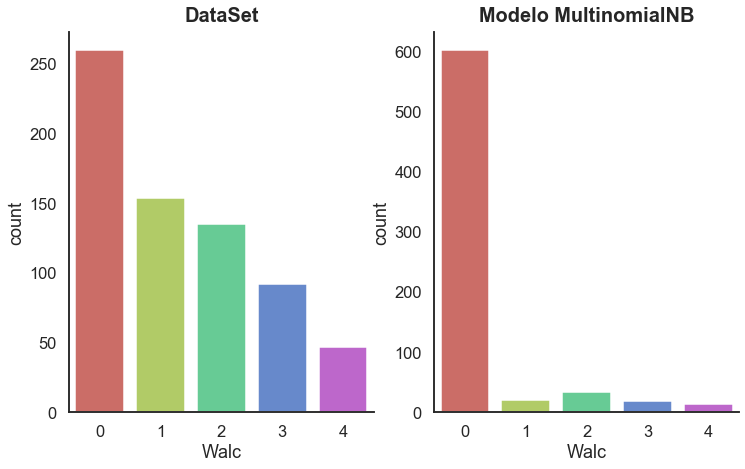

In [43]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('DataSet', fontsize=20, fontweight='bold', pad=10)
ax2.set_title('Modelo MultinomialNB', fontsize=20, fontweight='bold', pad=10)

sns.set_style("white")
    
sns.despine()
sns.set_context("talk")
sns.countplot(ax=ax1,data=dfx_treino, x='Walc', order=dfx_treino.Walc.value_counts(normalize=True).index, palette='hls')
sns.countplot(ax=ax2,data=resultado, x='Walc', order=resultado.Walc.value_counts(normalize=True, sort=False).index, palette='hls')


### Random Forest

Assim como o Naive Bayes, escolhemos o Random Forest porque ele pode ser utilizado como um classificador, ou seja, nos ajudar a prever os rótulos sobre o consumo de álcool dos estudantes com base nas features, as colunas de relação familiar e social.

O RandomForest cria uma floresta aleatóriamente, que nada mais é do que uma combinação de árvores de decisão combinadas, na grande maioria das vezes, treinadas através do método de bagging. A ideia do método de bagging é de que a combinação dos modelos de aprendizado aumenta o resultado do modelo.



In [44]:
from sklearn.ensemble import RandomForestClassifier

# Create the model with 100 trees
model = RandomForestClassifier(n_estimators=100)
# Fit on training data
model.fit(dfx_treino[feature], dfx_treino[target].values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [45]:
forest = pd.Series(model.predict(dfx_treino[feature]))
resultado_forest = pd.DataFrame(forest)
resultado_forest.columns = ['Walc']

In [46]:
acuracia_random_forest = model.score(dfx_treino[feature], dfx_treino[target])*100
print(f'A acuracia do modelo é de: {acuracia_random_forest.round(2)}%')

A acuracia do modelo é de: 99.85%


## Visualizando RandomForest no Treino

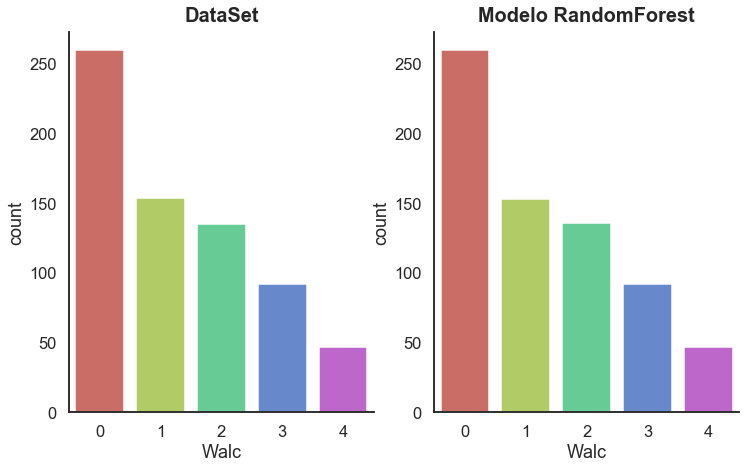

In [47]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('DataSet', fontsize=20, fontweight='bold', pad=10)
ax2.set_title('Modelo RandomForest', fontsize=20, fontweight='bold', pad=10)

sns.set_style("white")
    
sns.despine()
sns.set_context("talk")
sns.countplot(ax=ax1,data=dfx_treino, x='Walc', order=dfx_treino.Walc.value_counts(normalize=True).index, palette='hls')
sns.countplot(ax=ax2,data=resultado_forest, x='Walc', order=resultado_forest.Walc.value_counts(normalize=True, sort=False).index, palette='hls')


<div id="teste"></div>

## Executando Testes para os dois modelos

### RandomForest

In [48]:
resultado_random_forest = pd.Series(model.predict(dfx_test[feature]))
resultado_random_forest_test = pd.DataFrame(resultado_random_forest)
resultado_random_forest_test.columns = ['Walc']

In [49]:
acuracia_random_forest_test = model.score(dfx_test[feature], dfx_test[target])*100
print(f'A acuracia do modelo randomForest no teste é de: {acuracia_random_forest_test.round(2)}%')

A acuracia do modelo randomForest no teste é de: 68.14%


### MultinomialNB

In [50]:
resultado_multinomialNB = pd.Series(clf.predict(dfx_test[feature]))
resultado_multinomialNB_teste = pd.DataFrame(resultado_multinomialNB)
resultado_multinomialNB_teste.columns = ['Walc']

In [51]:
acuracia_multinomial_NB_teste = clf.score(dfx_test[feature], dfx_test[target])*100
print(f'A acuracia do modelo multinomialNB no teste é de: {acuracia_multinomial_NB_teste.round(2)}%')

A acuracia do modelo multinomialNB no teste é de: 38.94%


### Regressão logistica

In [82]:
from sklearn.linear_model import LogisticRegression
clr = LogisticRegression(random_state=0, solver='sag', max_iter=1000)
clr.fit(dfx_treino[feature], dfx_treino[target].values.ravel())
clr.predict(dfx_test[feature]);

In [83]:
resultado_regressionLogistic = pd.Series(clr.predict(dfx_test[feature]))
resultado_regressionLogistic_teste = pd.DataFrame(resultado_regressionLogistic)
resultado_regressionLogistic_teste.columns = ['Walc']

In [86]:
acuracia_regressionLogistic_teste = clr.score(dfx_test[feature], dfx_test[target])*100
print(f'A acuracia do modelo de regressão logistica no teste é de: {acuracia_regressionLogistic_teste.round(2)}%')

A acuracia do modelo de regressão logistica no teste é de: 40.12%


## Visualizando o Multinomial no seu Teste

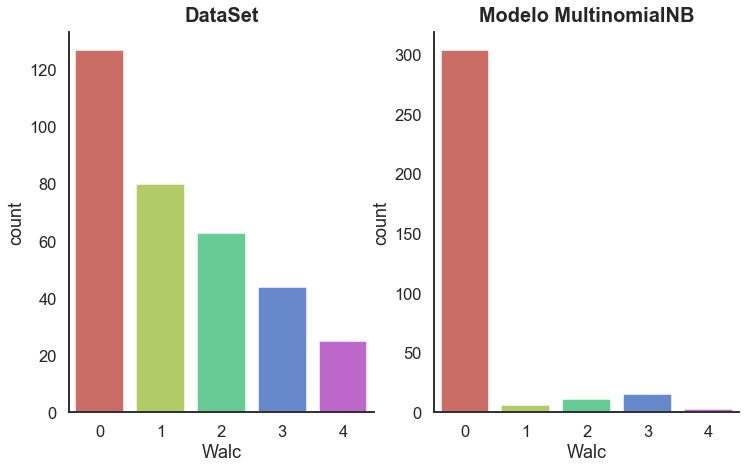

In [52]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('DataSet', fontsize=20, fontweight='bold', pad=10)
ax2.set_title('Modelo MultinomialNB', fontsize=20, fontweight='bold', pad=10)

sns.set_style("white")
    
sns.despine()
sns.set_context("talk")
sns.countplot(ax=ax1,data=dfx_test, x='Walc', order=dfx_test.Walc.value_counts(normalize=True).index, palette='hls')
sns.countplot(ax=ax2,data=resultado_multinomialNB_teste, x='Walc', order=resultado_multinomialNB_teste.Walc.value_counts(normalize=True, sort=False).index, palette='hls')


## Visualizando o RandomForest no seu Teste

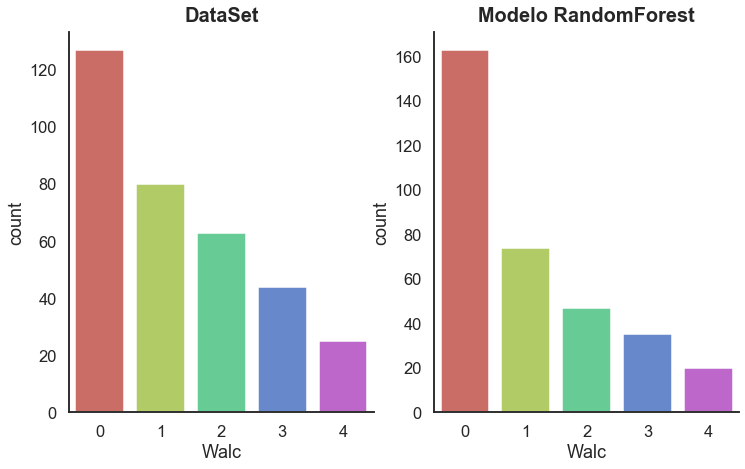

In [53]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('DataSet', fontsize=20, fontweight='bold', pad=10)
ax2.set_title('Modelo RandomForest', fontsize=20, fontweight='bold', pad=10)

sns.set_style("white")
    
sns.despine()
sns.set_context("talk")
sns.countplot(ax=ax1,data=dfx_test, x='Walc', order=dfx_test.Walc.value_counts(normalize=True).index, palette='hls')
sns.countplot(ax=ax2,data=resultado_random_forest_test, x='Walc', order=resultado_random_forest_test.Walc.value_counts(normalize=True, sort=False).index, palette='hls')


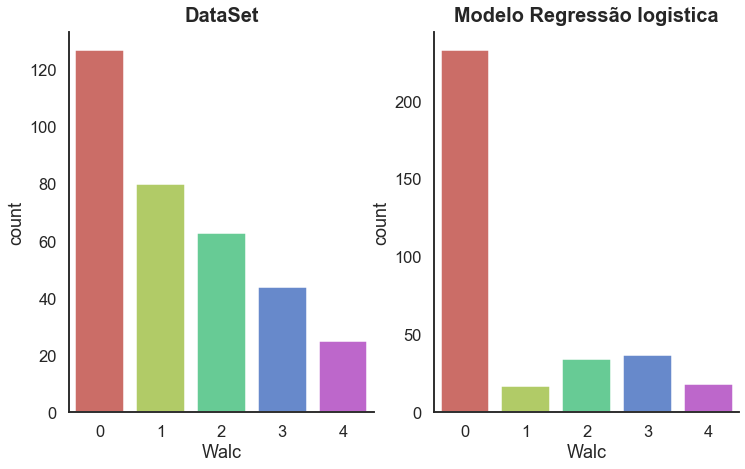

In [87]:
fig = plt.figure(figsize=(12,7))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.set_title('DataSet', fontsize=20, fontweight='bold', pad=10)
ax2.set_title('Modelo Regressão logistica', fontsize=20, fontweight='bold', pad=10)

sns.set_style("white")
    
sns.despine()
sns.set_context("talk")
sns.countplot(ax=ax1,data=dfx_test, x='Walc', order=dfx_test.Walc.value_counts(normalize=True).index, palette='hls')
sns.countplot(ax=ax2,data=resultado_regressionLogistic_teste, x='Walc', order=resultado_regressionLogistic_teste.Walc.value_counts(normalize=True, sort=False).index, palette='hls')


## Matriz de Confusão para entender melhor os resultados

In [97]:
from sklearn.metrics import confusion_matrix
y_true = dfx_test.Walc
y_pred_RF = resultado_random_forest
y_pred_NB = resultado_multinomialNB
y_pred_RL = resultado_regressionLogistic


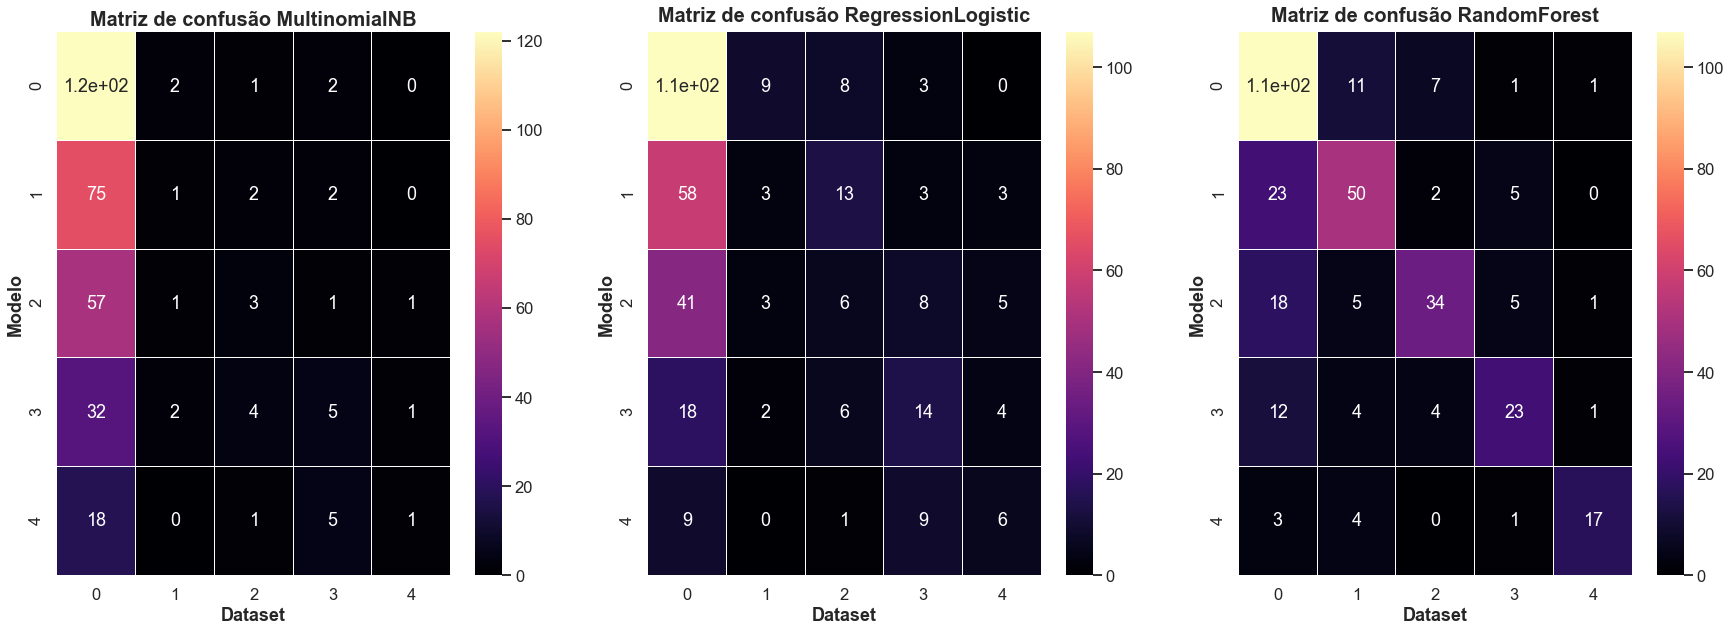

In [145]:
fig = plt.figure(figsize=(30,10))
ax = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

confusion_matrix_NB = confusion_matrix(y_true, y_pred_NB)
confusion_matrix_RF = confusion_matrix(y_true, y_pred_RF)
confusion_matrix_RL = confusion_matrix(y_true, y_pred_RL)

sns.set_context("talk")
sns.heatmap(ax=ax, data=confusion_matrix_NB, annot=True, linewidths=.01, cmap='magma')
ax.set_title('Matriz de confusão MultinomialNB', fontsize=20, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=18, fontweight='bold')
ax.set_ylabel('Modelo', fontsize=18, fontweight='bold')

sns.heatmap(ax=ax2, data=confusion_matrix_RL,annot=True, linewidths=.01, cmap='magma')
ax2.set_title('Matriz de confusão RegressionLogistic',pad=10 , fontsize=20, fontweight='bold')
ax2.set_xlabel('Dataset', fontsize=18, fontweight='bold')
ax2.set_ylabel('Modelo', fontsize=18, fontweight='bold')

sns.heatmap(ax=ax3, data=confusion_matrix_RF, annot=True, linewidths=.01, cmap='magma')
ax3.set_title('Matriz de confusão RandomForest', pad=10 , fontsize=20, fontweight='bold')
ax3.set_xlabel('Dataset', fontsize=18, fontweight='bold')
ax3.set_ylabel('Modelo', fontsize=18, fontweight='bold')
plt.show()
    

<div id="analise"></div>

## Análise de modelos e resultados

Após o realizamento do teste, o modelo multinomialNB demonstrou ser pouco preciso no nosso caso, não só por ter tido uma acuracia de aproximadamente 39%, mesmo após o ajuste do coeficiente alpha, como também por ter classificado quase todos os alunos como "muito baixo", em relação ao consumo de bebidas alcóolica.


Já no teste com o modelo Random Forest, a acuracia do teste chegou a aproximadamente 70%, sendo um modelo bem mais preciso e confiável quanto a classificação do consumo de álcool dos alunos do dataset.

<div id="conclusao"></div>

## Conclusão


Através da comparação do resultado obtido entre o modelo do Random Forest e os gráficos de cruzamento do consumo de álcool com cada uma das variáveis familiares e sociais, foi possível perceber que o comportamento dos gráficos são muito parecidos, principalmente pela proporção em que está distribuído o consumo de álcool em cada um dos níveis. A partir disso, foi possível perceber que para a amostra de alunos presente no dataset, os aspectos familiares e sociais quando consideram como um todo, não afetam diretamente o consumo de álcool que os alunos vão ter.

<div id="bibliografia"></div>

## Bibliografia



Para o desenvolvimento do projeto, estamos considerando as seguintes bibliografias:

- https://www.sbp.com.br/especiais/pediatria-para-familias/adolescencia/adolescencia-e-alcool/
- https://www.scielo.br/scielo.php?script=sci_arttext&pid=S0104-11692004000700005&lng=es&tlng=es
- https://www.scielo.br/scielo.php?script=sci_arttext&pid=S1516-44462004000500005
- https://www.sbp.com.br/fileadmin/user_upload/publicacoes/N-ManOrient-Alcoolismo.pdf
- https://ensinandomaquinasblog.wordpress.com/2017/12/15/modelos-preditivos-de-notas-de-redacao-do-enem-2015/